In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder 

In [2]:
data = pd.read_csv('Question.csv')
data['小朋友營養分數'] = data['小朋友昨天全日有否攝取以下數量[3至4碗穀物類]'] + data['小朋友昨天全日有否攝取以下數量[最少2份蔬菜]'] + data['小朋友昨天全日有否攝取以下數量[最少2份水果]'] + data['小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]'] + data['小朋友昨天全日有否攝取以下數量[2份奶類及代替品]'] + data['小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]'] 


In [3]:
data['居所的同住人數是'] = data['居所的同住人數是'].astype(int)

for key in range(len(data['家庭每月收入是'])):
    if data['家庭每月收入是'][key] == '0-2000':
        data['家庭每月收入是'][key] = 0
    elif data['家庭每月收入是'][key] == '2001-5000':
        data['家庭每月收入是'][key] = 1
    elif data['家庭每月收入是'][key] == '5001-10000':
        data['家庭每月收入是'][key] = 2
    elif data['家庭每月收入是'][key] == '10001-15000':
        data['家庭每月收入是'][key] = 3
    elif data['家庭每月收入是'][key] == '15001-20000':
        data['家庭每月收入是'][key] = 4
    else :
        data['家庭每月收入是'][key] = 5

for key in range(len(data['家庭每月飲食方面的支出有多少'])):
    if data['家庭每月飲食方面的支出有多少'][key] == '2000以下':
        data['家庭每月飲食方面的支出有多少'][key] = 0
    elif data['家庭每月飲食方面的支出有多少'][key] == '2001-4000':
        data['家庭每月飲食方面的支出有多少'][key] = 1
    elif data['家庭每月飲食方面的支出有多少'][key] == '4001-6000':
        data['家庭每月飲食方面的支出有多少'][key] = 2
    elif data['家庭每月飲食方面的支出有多少'][key] == '6000以上':
        data['家庭每月飲食方面的支出有多少'][key] = 3

In [62]:
label1 = LabelEncoder()
label2 = LabelEncoder()
label3 = LabelEncoder()
label4 = LabelEncoder()
label1.fit(data['受訪者年齡'])
data['受訪者年齡'] = label1.transform(data['受訪者年齡']) 
label2.fit(data['受訪者教育程度'])
data['受訪者教育程度'] = label2.transform(data['受訪者教育程度']) 
label3.fit(data['家庭每月收入是'])
data['家庭每月收入是'] = label3.transform(data['家庭每月收入是']) 
label4.fit(data['家庭每月飲食方面的支出有多少'])
data['家庭每月飲食方面的支出有多少'] = label4.transform(data['家庭每月飲食方面的支出有多少']) 

In [68]:
for key in range(len(data['家庭每月收入是'])):
    if data['家庭每月收入是'][key] == '0-2000':
        data['家庭每月收入是'][key] = 0
    elif data['家庭每月收入是'][key] == '2001-5000':
        data['家庭每月收入是'][key] = 1
    elif data['家庭每月收入是'][key] == '5001-10000':
        data['家庭每月收入是'][key] = 2
    elif data['家庭每月收入是'][key] == '10001-15000':
        data['家庭每月收入是'][key] = 3
    elif data['家庭每月收入是'][key] == '15001-20000':
        data['家庭每月收入是'][key] = 4
    else :
        data['家庭每月收入是'][key] = 5

for key in range(len(data['家庭每月飲食方面的支出有多少'])):
    if data['家庭每月飲食方面的支出有多少'][key] == '2000以下':
        data['家庭每月飲食方面的支出有多少'][key] = 0
    elif data['家庭每月飲食方面的支出有多少'][key] == '2001-4000':
        data['家庭每月飲食方面的支出有多少'][key] = 1
    elif data['家庭每月飲食方面的支出有多少'][key] == '4001-6000':
        data['家庭每月飲食方面的支出有多少'][key] = 2
    elif data['家庭每月飲食方面的支出有多少'][key] == '6000以上':
        data['家庭每月飲食方面的支出有多少'][key] = 3

Text(0.5, 0, '人數')

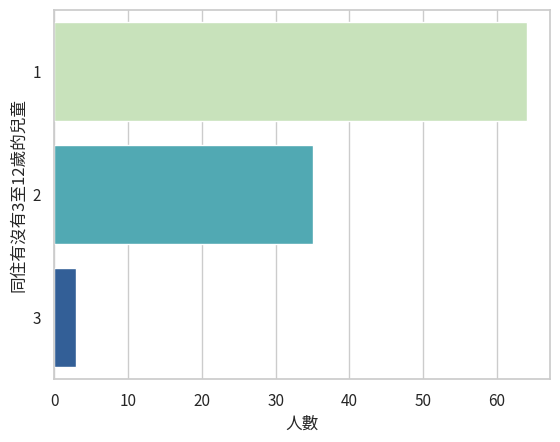

In [4]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, y='同住有沒有3至12歲的兒童',palette="YlGnBu")
plt.xlabel("人數")

In [5]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

Text(0, 0.5, '數目')

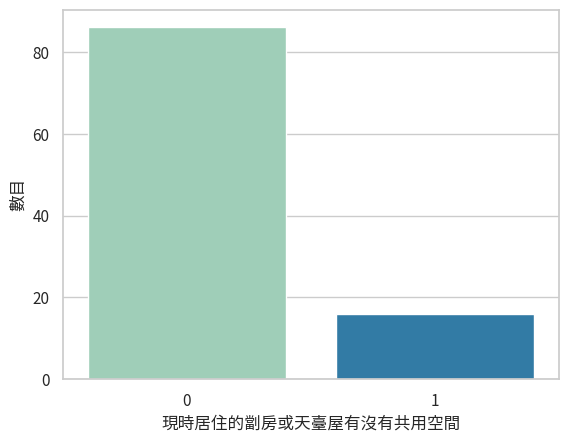

In [6]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, x='現時居住的劏房或天臺屋有沒有共用空間',palette="YlGnBu")
plt.ylabel("數目")

Text(0, 0.5, '數目')

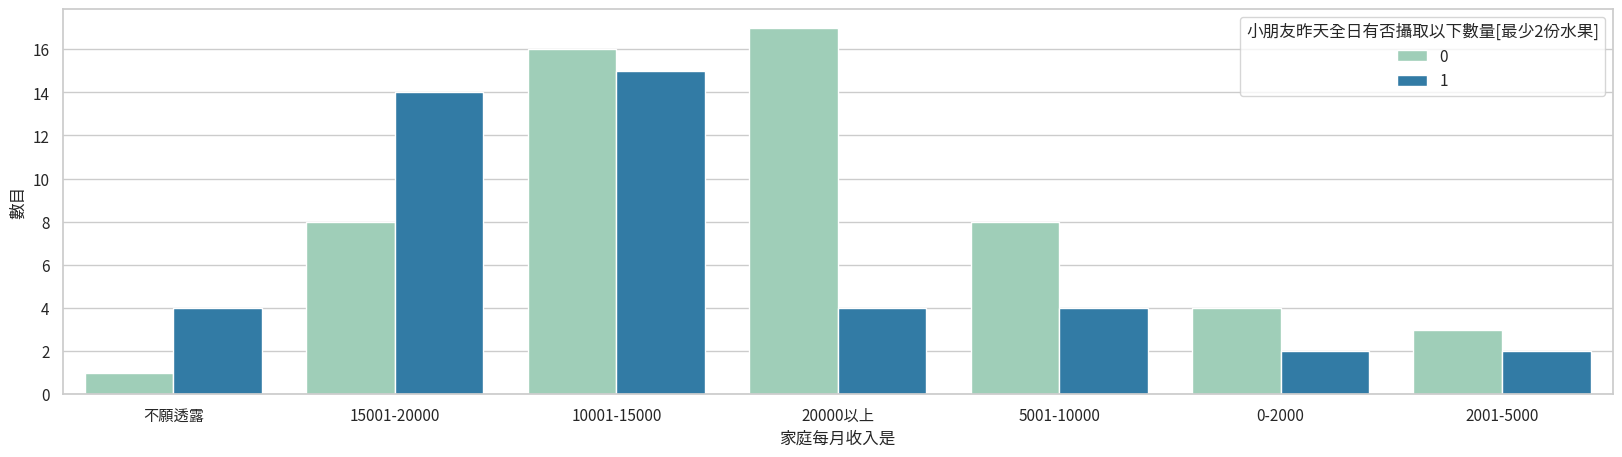

In [7]:
plt.figure(figsize=(20,5))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, x='家庭每月收入是',palette="YlGnBu",hue='小朋友昨天全日有否攝取以下數量[最少2份水果]')
plt.ylabel("數目")

In [8]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

Text(0.5, 1.0, '家庭每月飲食方面的支出有多少')

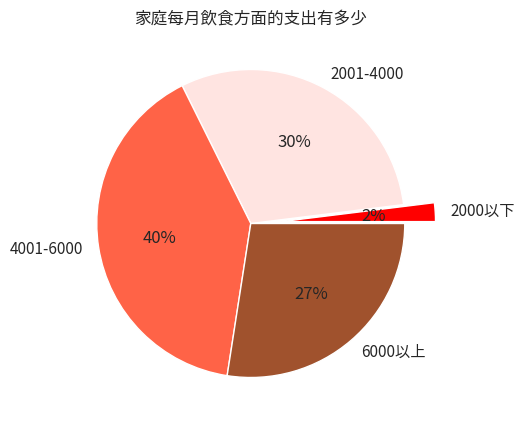

In [9]:
plt.figure(figsize=(10,5))
colors = ['red', 'mistyrose', 'tomato', 'sienna']
explode = (0.2, 0, 0,0)
data['家庭每月飲食方面的支出有多少'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("家庭每月飲食方面的支出有多少")

[Text(0, 0.5, '百分比')]

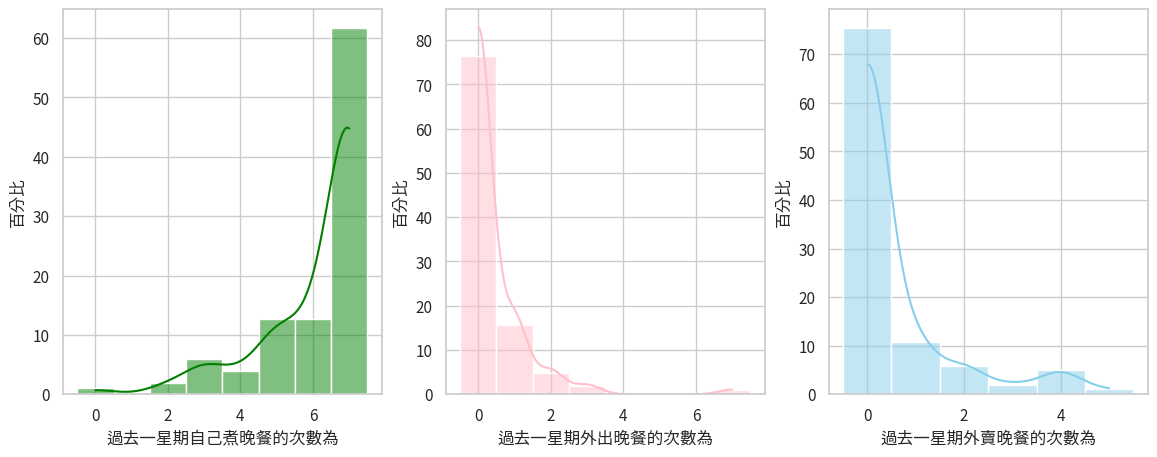

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (14, 5))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

sns.histplot(ax = axes[0],data=data["過去一星期自己煮晚餐的次數為"], kde=True,color="green",discrete=True,stat='percent').set(ylabel = "百分比")
sns.histplot(ax = axes[1],data=data['過去一星期外出晚餐的次數為'], kde=True,color="pink",discrete=True,stat='percent').set(ylabel = "百分比")
sns.histplot(ax = axes[2],data=data['過去一星期外賣晚餐的次數為'], kde=True,color="skyblue",discrete=True,stat='percent').set(ylabel = "百分比")



Text(0.5, 1.0, '昨晚晚餐是自己煮、外出用膳或外賣')

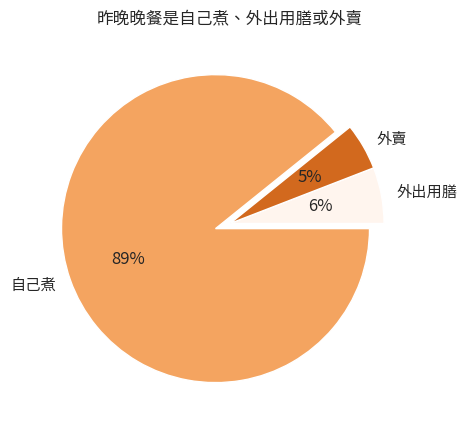

In [11]:
plt.figure(figsize=(10,5))
colors = [ 'seashell', 'chocolate','sandybrown']
explode = (0, 0, 0.1)
data['昨晚晚餐是自己煮、外出用膳或外賣'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("昨晚晚餐是自己煮、外出用膳或外賣")

Text(0.5, 1.0, '受訪者性別')

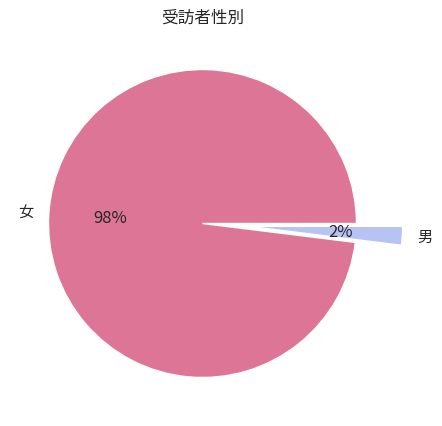

In [12]:
plt.figure(figsize=(10,5))
colors = [ '#DD7596','#B7C3F3']
explode = (0, 0.3)
data['受訪者性別'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title('受訪者性別')

Text(0.5, 1.0, '受訪者年齡')

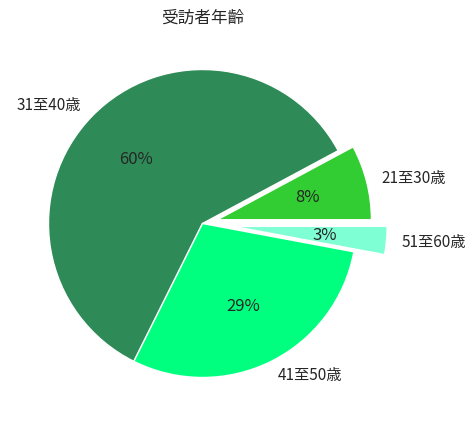

In [13]:
plt.figure(figsize=(10,5))
colors = ['limegreen', 'seagreen', 'springgreen', 'aquamarine']
explode = (0.1,0, 0,0.2)
data['受訪者年齡'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("受訪者年齡")

Text(0.5, 1.0, "'受訪者教育程度'")

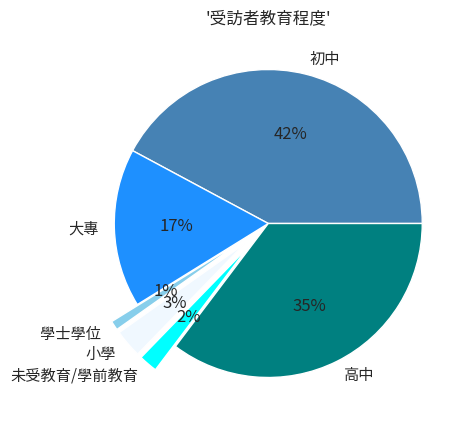

In [14]:
plt.figure(figsize=(10,5))
colors = ['steelblue', 'dodgerblue', 'skyblue', 'aliceblue',"aqua","teal"]
explode = (0,0, 0.2,0.2,0.2,0)
data['受訪者教育程度'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("'受訪者教育程度'")

In [15]:
plt.figure(figsize=(5,5))
colors = ['darkviolet', 'mediumorchid', 'violet', 'thistle',"mediumvioletred"]
explode = (0,0,0,0.1,0.2)
data['居所的同住人數是'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("居所的同住人數是")

AttributeError: Can only use .str accessor with string values!

<Figure size 500x500 with 0 Axes>

Text(0.5, 1.0, '家庭每月收入是')

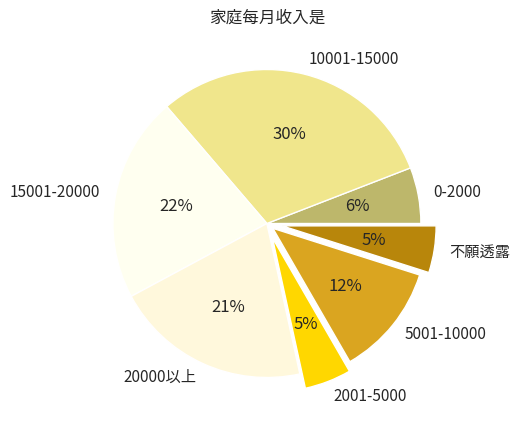

In [ ]:
plt.figure(figsize=(5,5))
colors = ['darkkhaki', 'khaki', 'ivory', 'cornsilk',"gold","goldenrod", "darkgoldenrod"]
explode = (0,0,0,0,0.1,0.05,0.1)
data['家庭每月收入是'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("家庭每月收入是")

In [ ]:
 
data['家庭每月收入是'].str.get_dummies().sum()

0-2000          6
10001-15000    31
15001-20000    22
20000以上        21
2001-5000       5
5001-10000     12
不願透露            5
dtype: int64

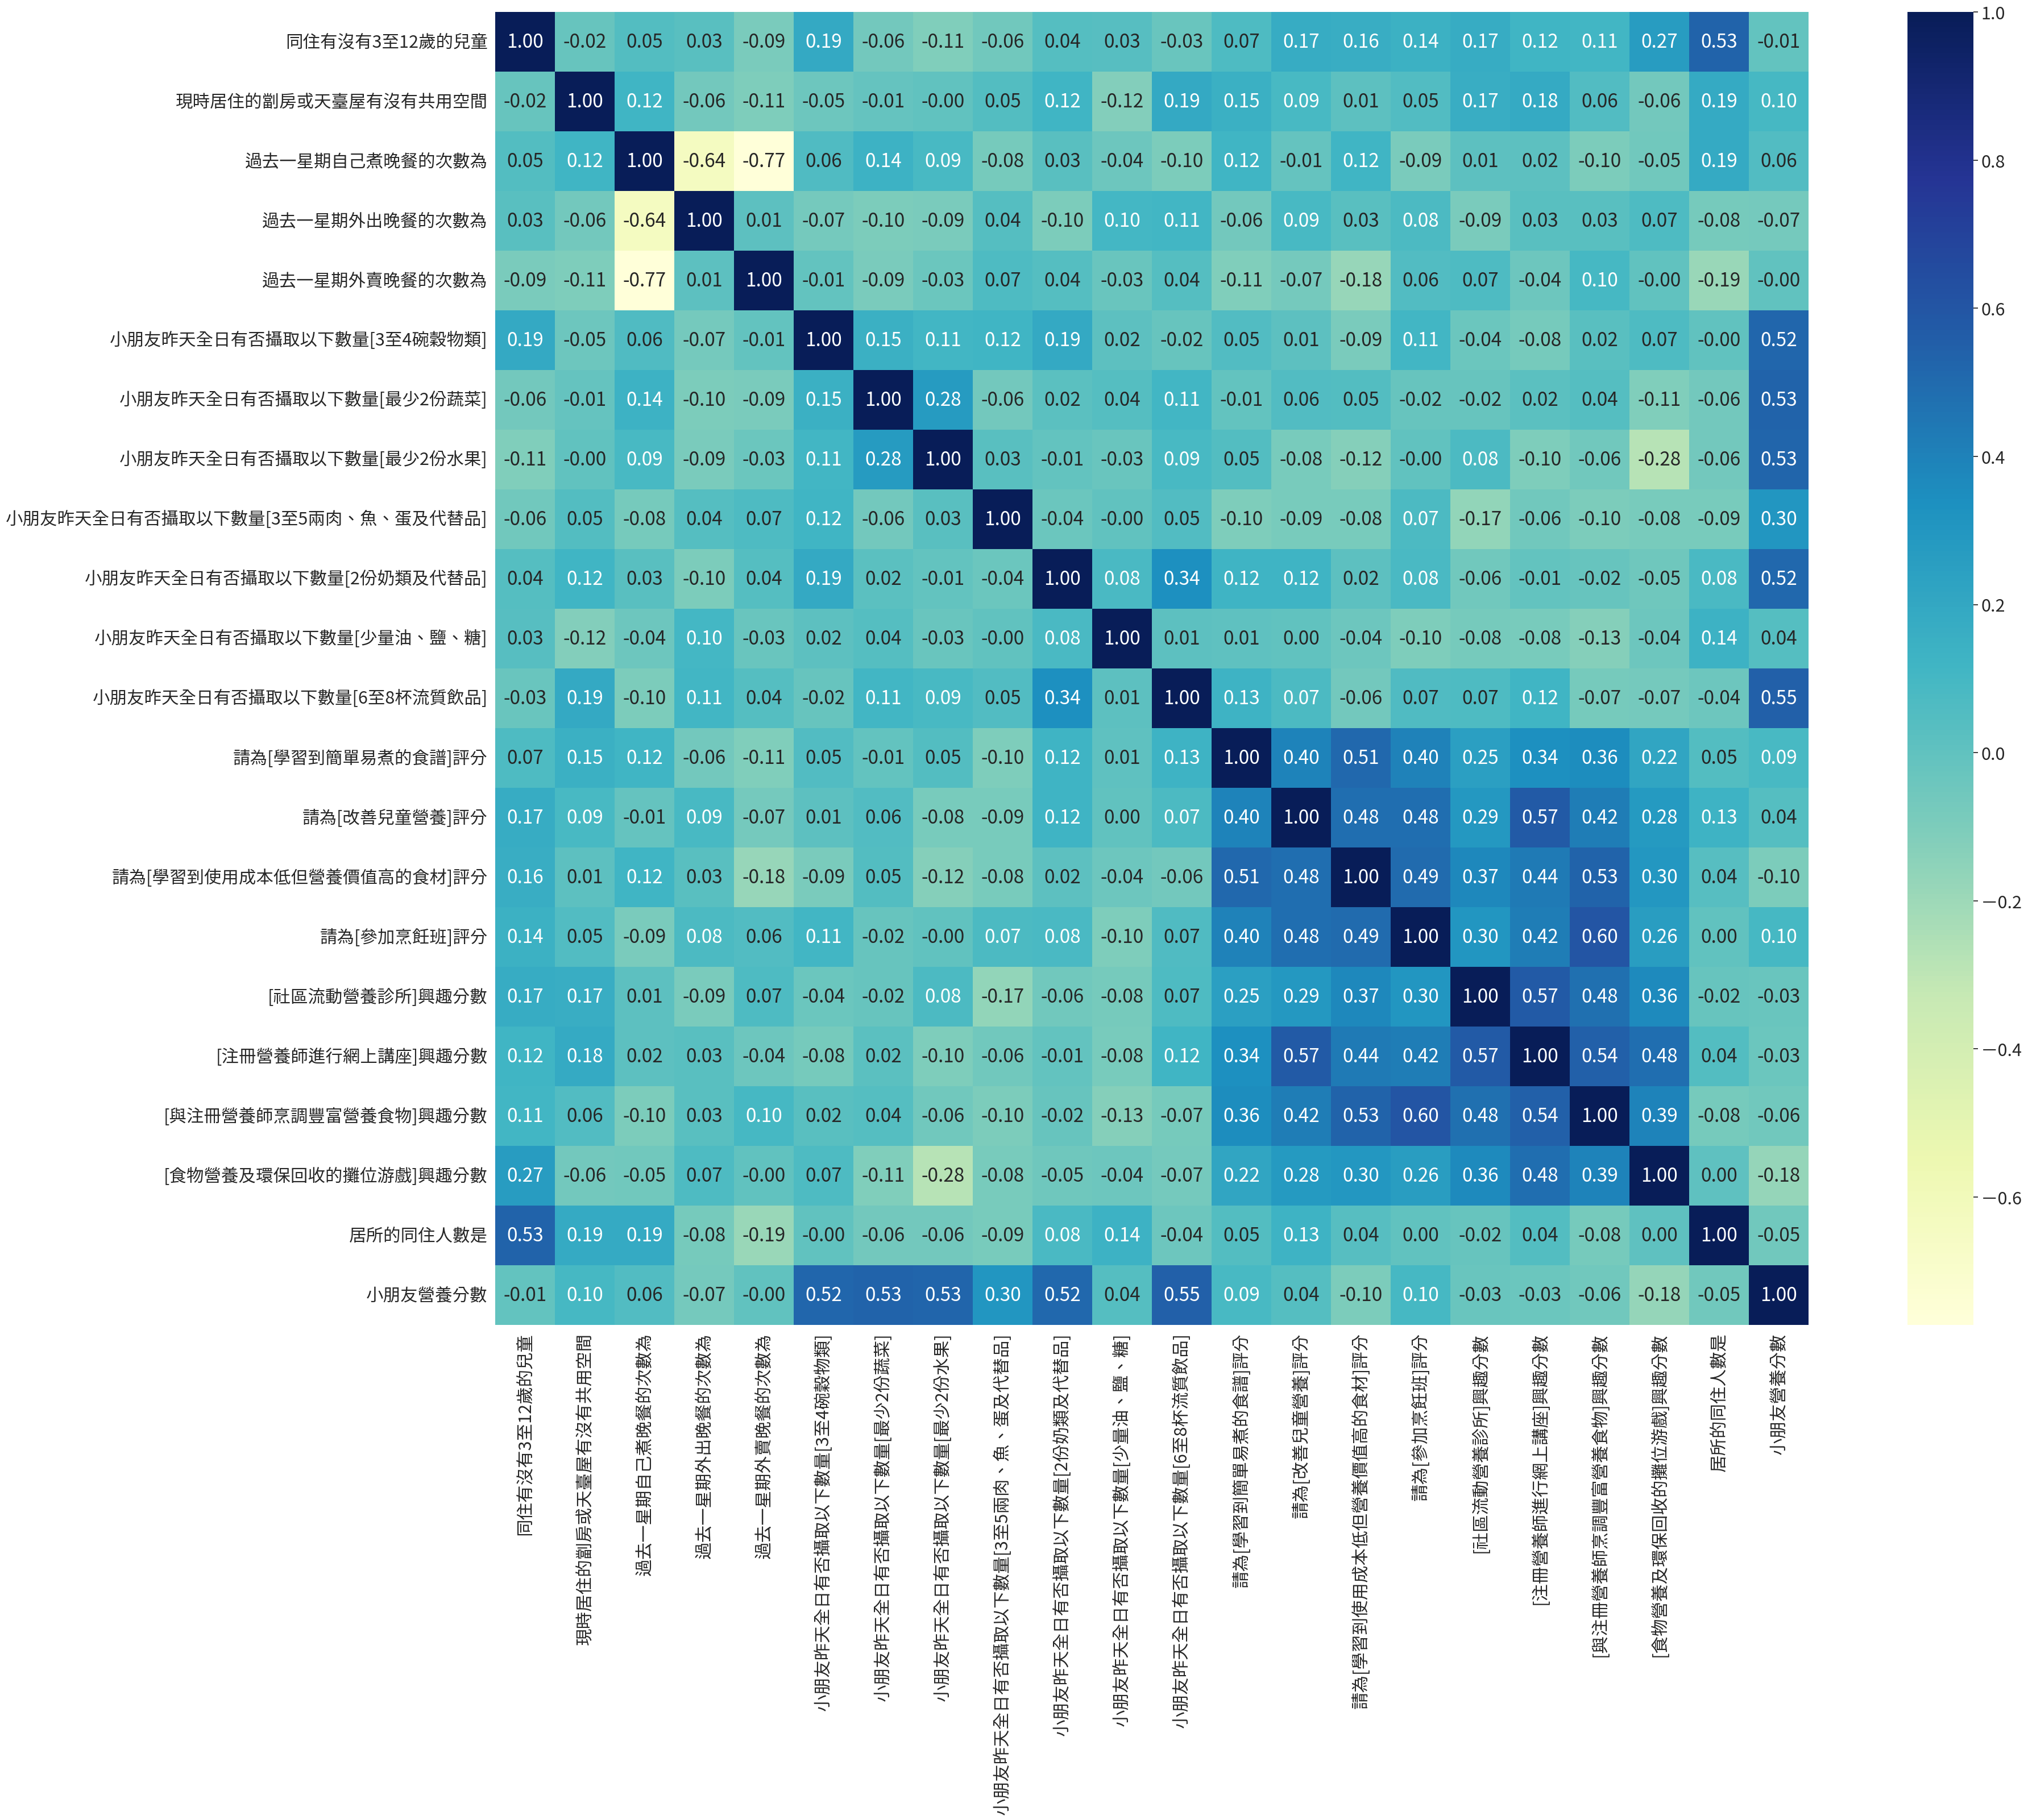

In [ ]:
corr = data.corr()
plt.figure(figsize=(45,30))
sns.set(font_scale=2) # size of font
sns.heatmap(corr,cbar=True, annot=True, square=True ,fmt='.2f',cmap="YlGnBu")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.show()


In [ ]:
data_null = data.drop(columns=['沒有吃3至4碗穀物類的其他原因是','沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?','沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是'],axis=1)
data_null = pd.DataFrame(data_null.isna().sum())
data_null = data_null.sort_values(by = 0 ,ascending = False)


fig = make_subplots(rows=1, 
                    cols=1,
                    column_titles = ["Data"] ,
                    x_title="Missing Values")

fig.add_trace(go.Bar(x=data_null[0],
                     y=data_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)' , 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)

c:\ProgramData\Anaconda3\lib\site-packages\missingno\missingno.py:73: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

c:\ProgramData\Anaconda3\lib\site-packages\missingno\missingno.py:142: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



<AxesSubplot:>

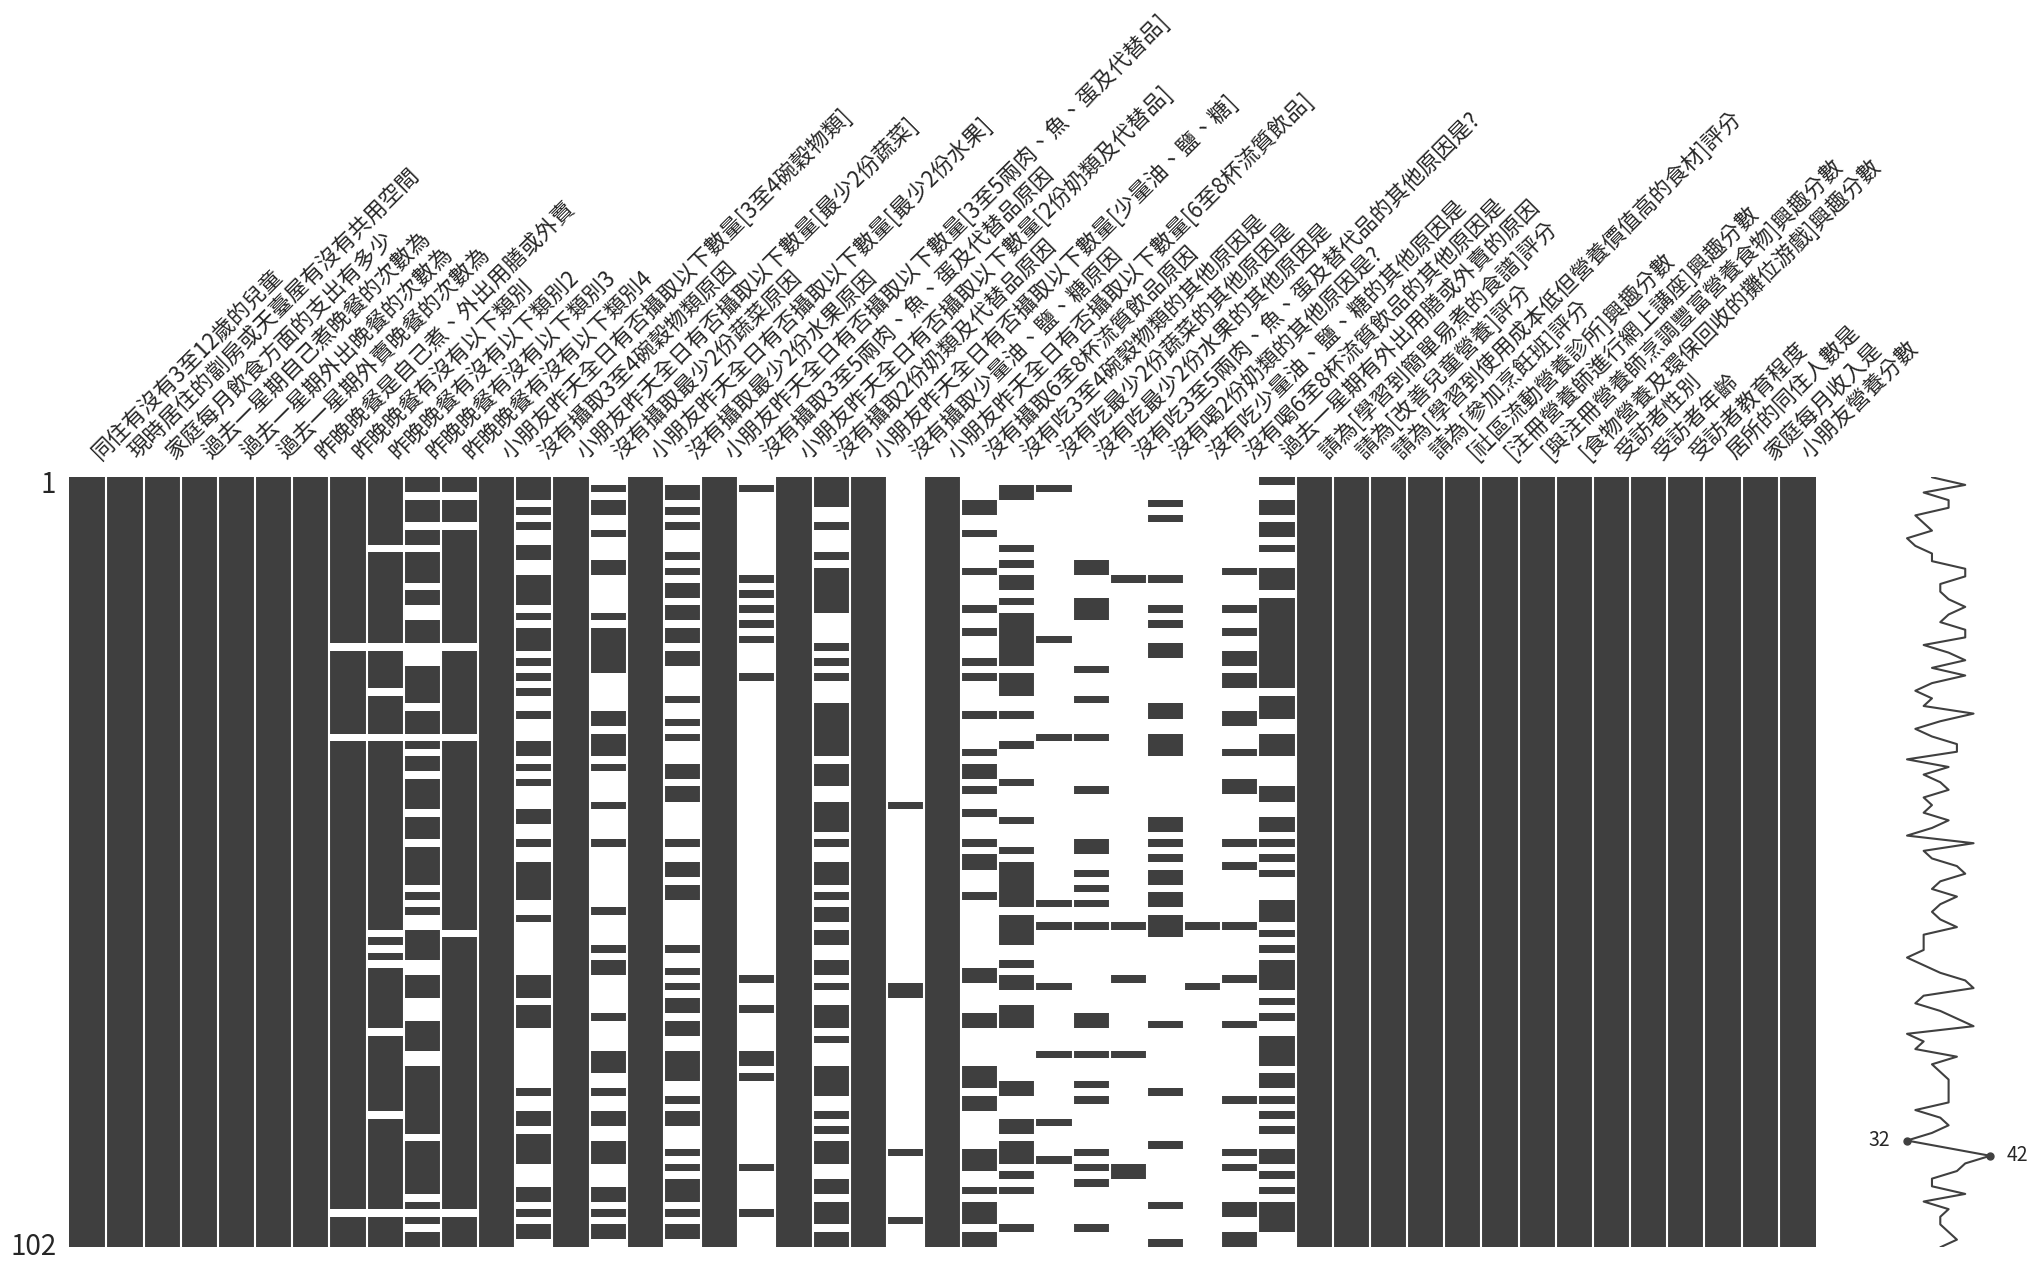

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

Text(0.5, 1.0, '每月收入')

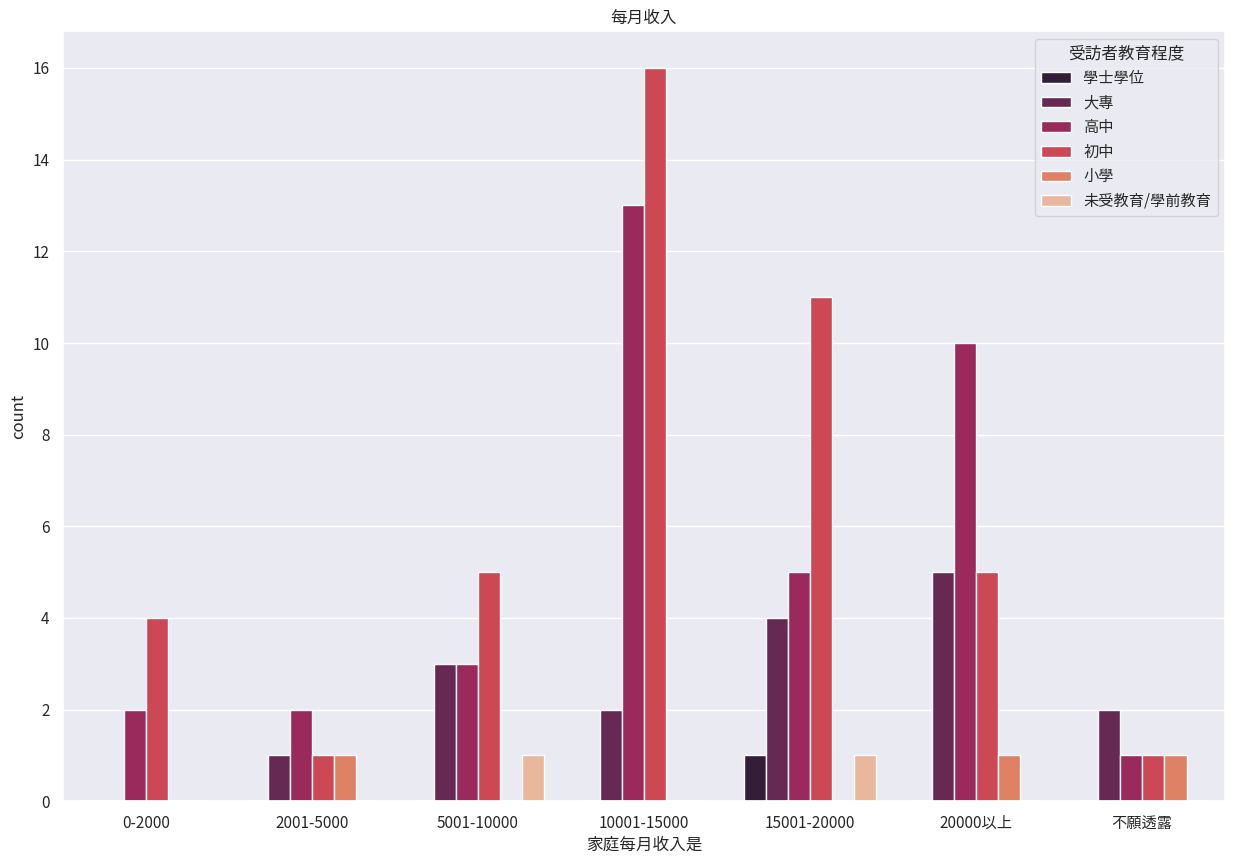

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1) # size of font
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['學士學位','大專','高中','初中','小學','未受教育/學前教育']
ax=sns.countplot(data=data, x='家庭每月收入是', hue='受訪者教育程度',order=['0-2000','2001-5000','5001-10000','10001-15000','15001-20000','20000以上','不願透露'],hue_order=hue_order,palette="rocket")
plt.title('每月收入')


<AxesSubplot:xlabel='小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', ylabel='count'>

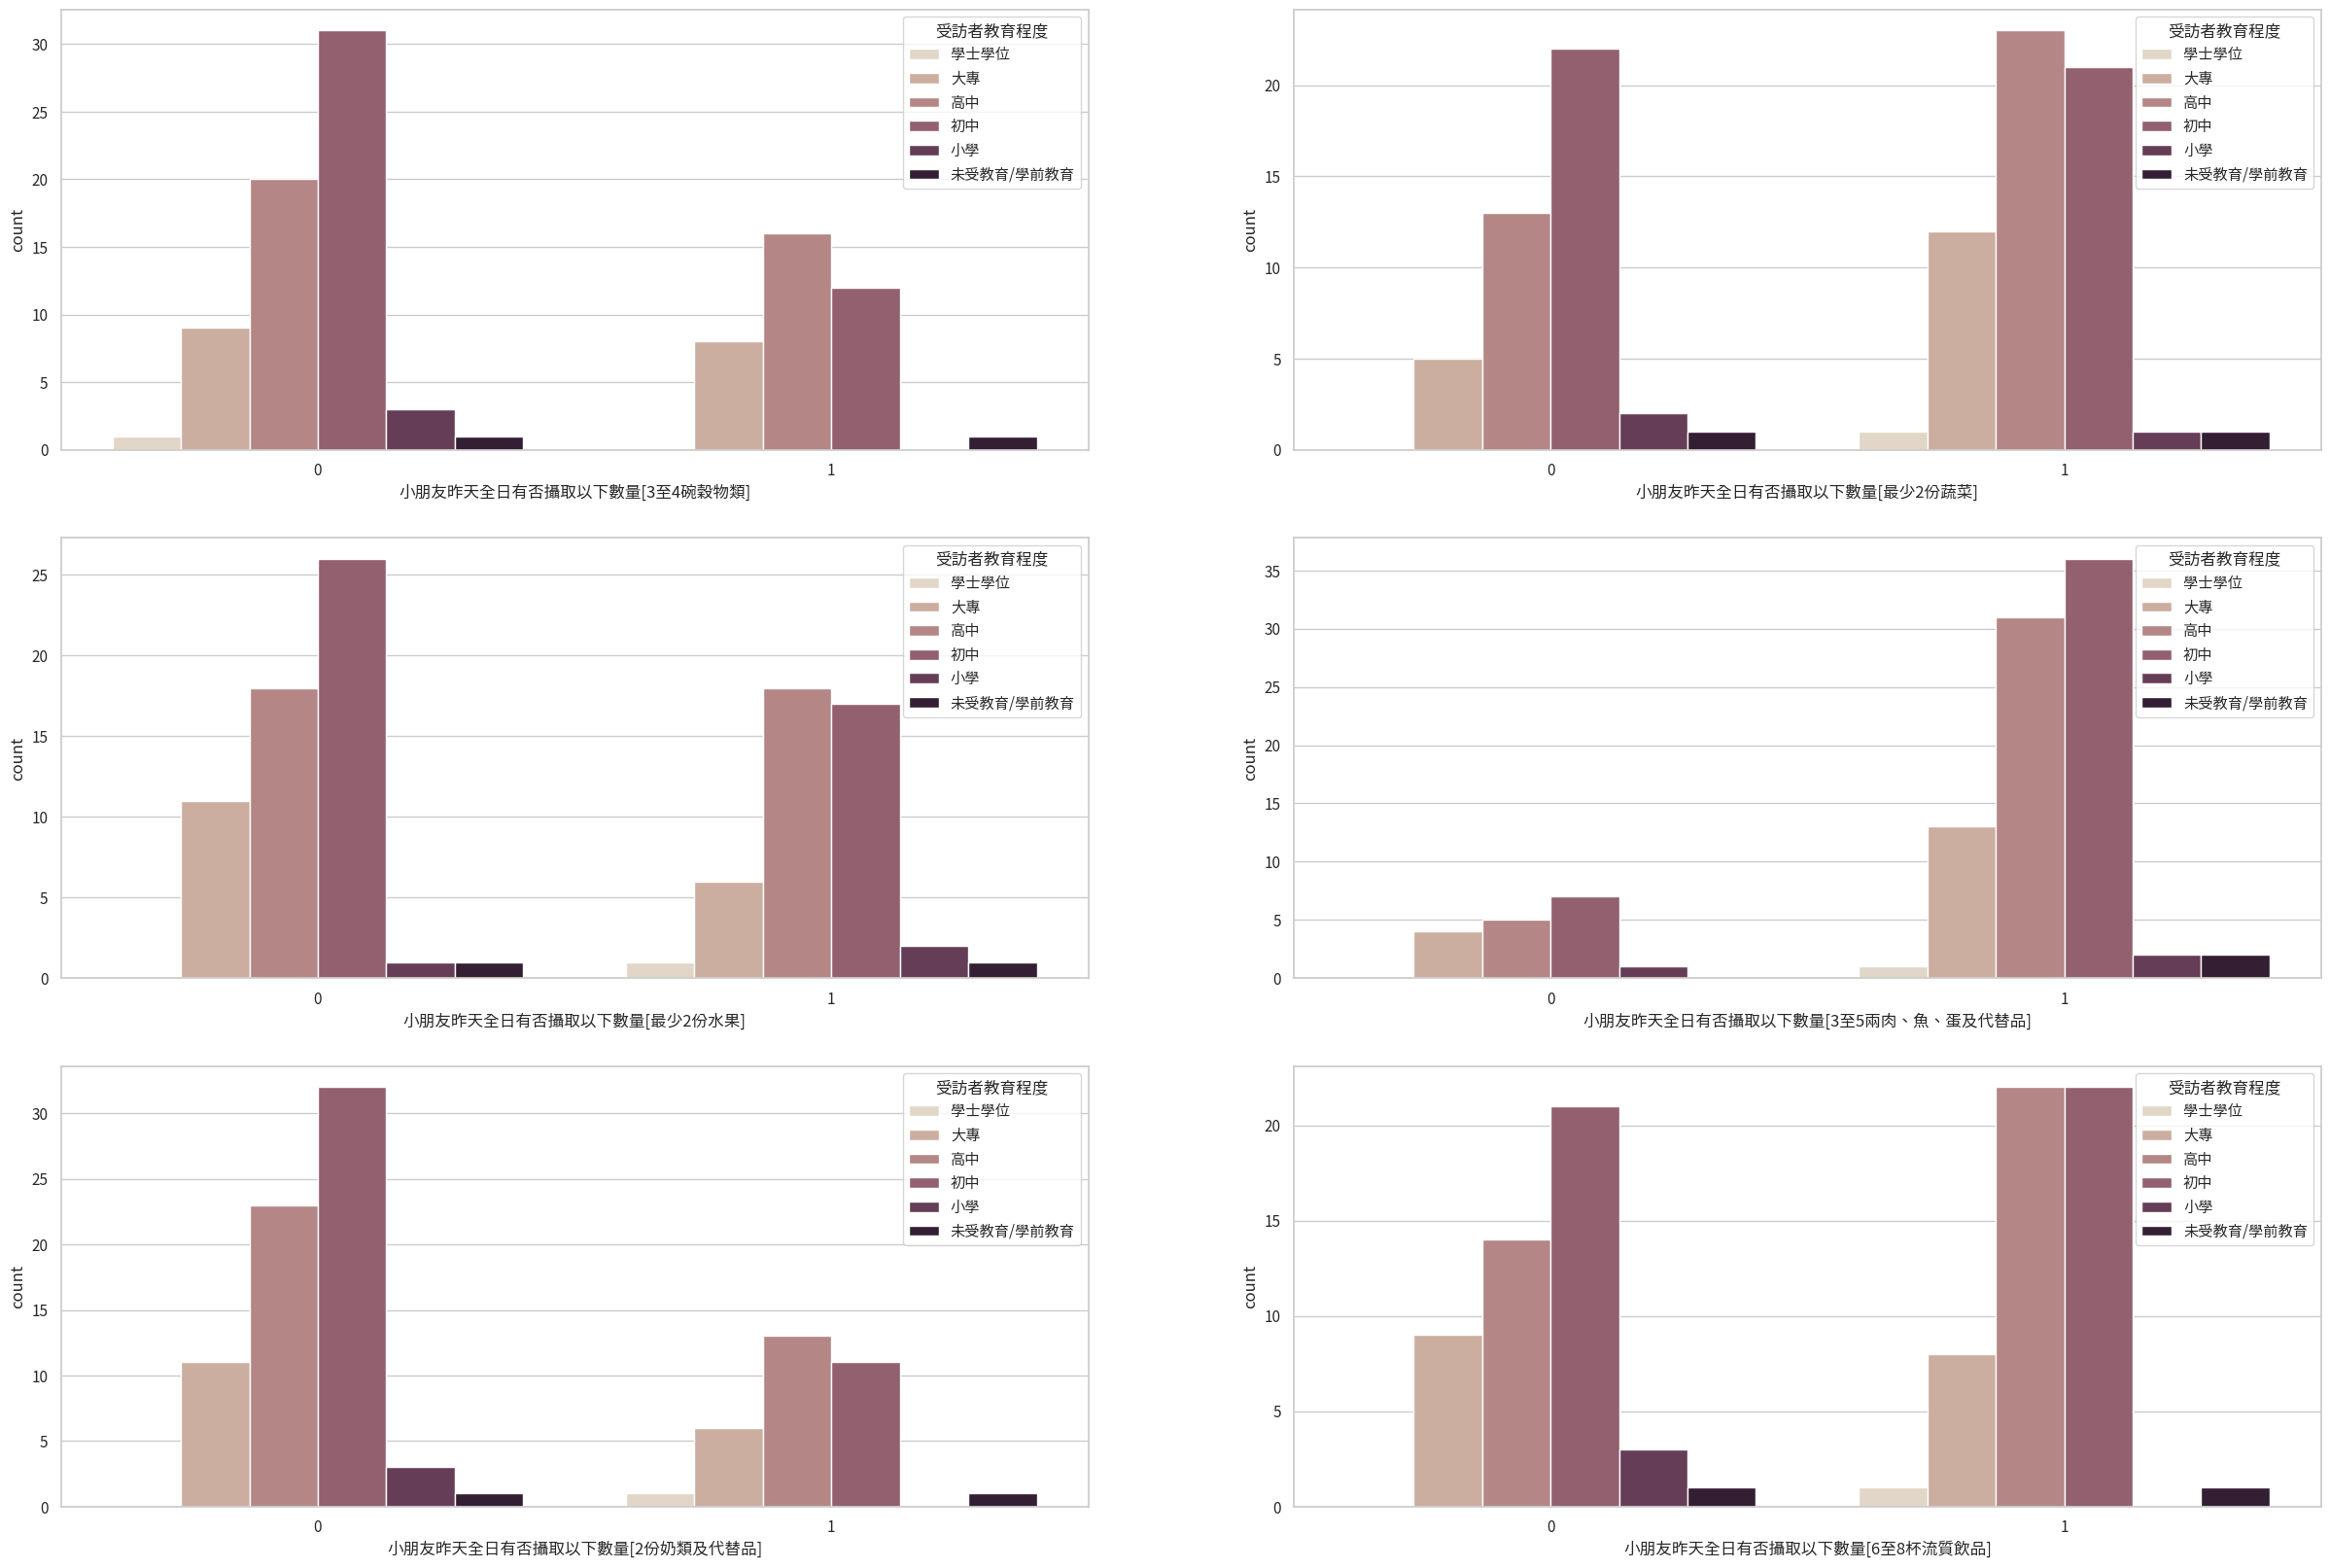

In [16]:
fig, axes = plt.subplots(3, 2, figsize = (30, 20))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['學士學位','大專','高中','初中','小學','未受教育/學前教育']

sns.countplot(ax = axes[0],x='小朋友昨天全日有否攝取以下數量[3至4碗穀物類]',hue='受訪者教育程度',hue_order=hue_order ,data=data,palette="ch:.25")
sns.countplot(ax = axes[1],x='小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',hue='受訪者教育程度',hue_order=hue_order ,data=data,palette="ch:.25")
sns.countplot(ax = axes[2],x='小朋友昨天全日有否攝取以下數量[最少2份水果]',hue='受訪者教育程度',hue_order=hue_order ,data=data,palette="ch:.25")
sns.countplot(ax = axes[3],x='小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]',hue='受訪者教育程度',hue_order=hue_order ,data=data,palette="ch:.25")
sns.countplot(ax = axes[4],x='小朋友昨天全日有否攝取以下數量[2份奶類及代替品]',hue='受訪者教育程度',hue_order=hue_order ,data=data,palette="ch:.25")
sns.countplot(ax = axes[5],x='小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]',hue='受訪者教育程度',hue_order=hue_order ,data=data,palette="ch:.25")

<AxesSubplot:xlabel='小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', ylabel='count'>

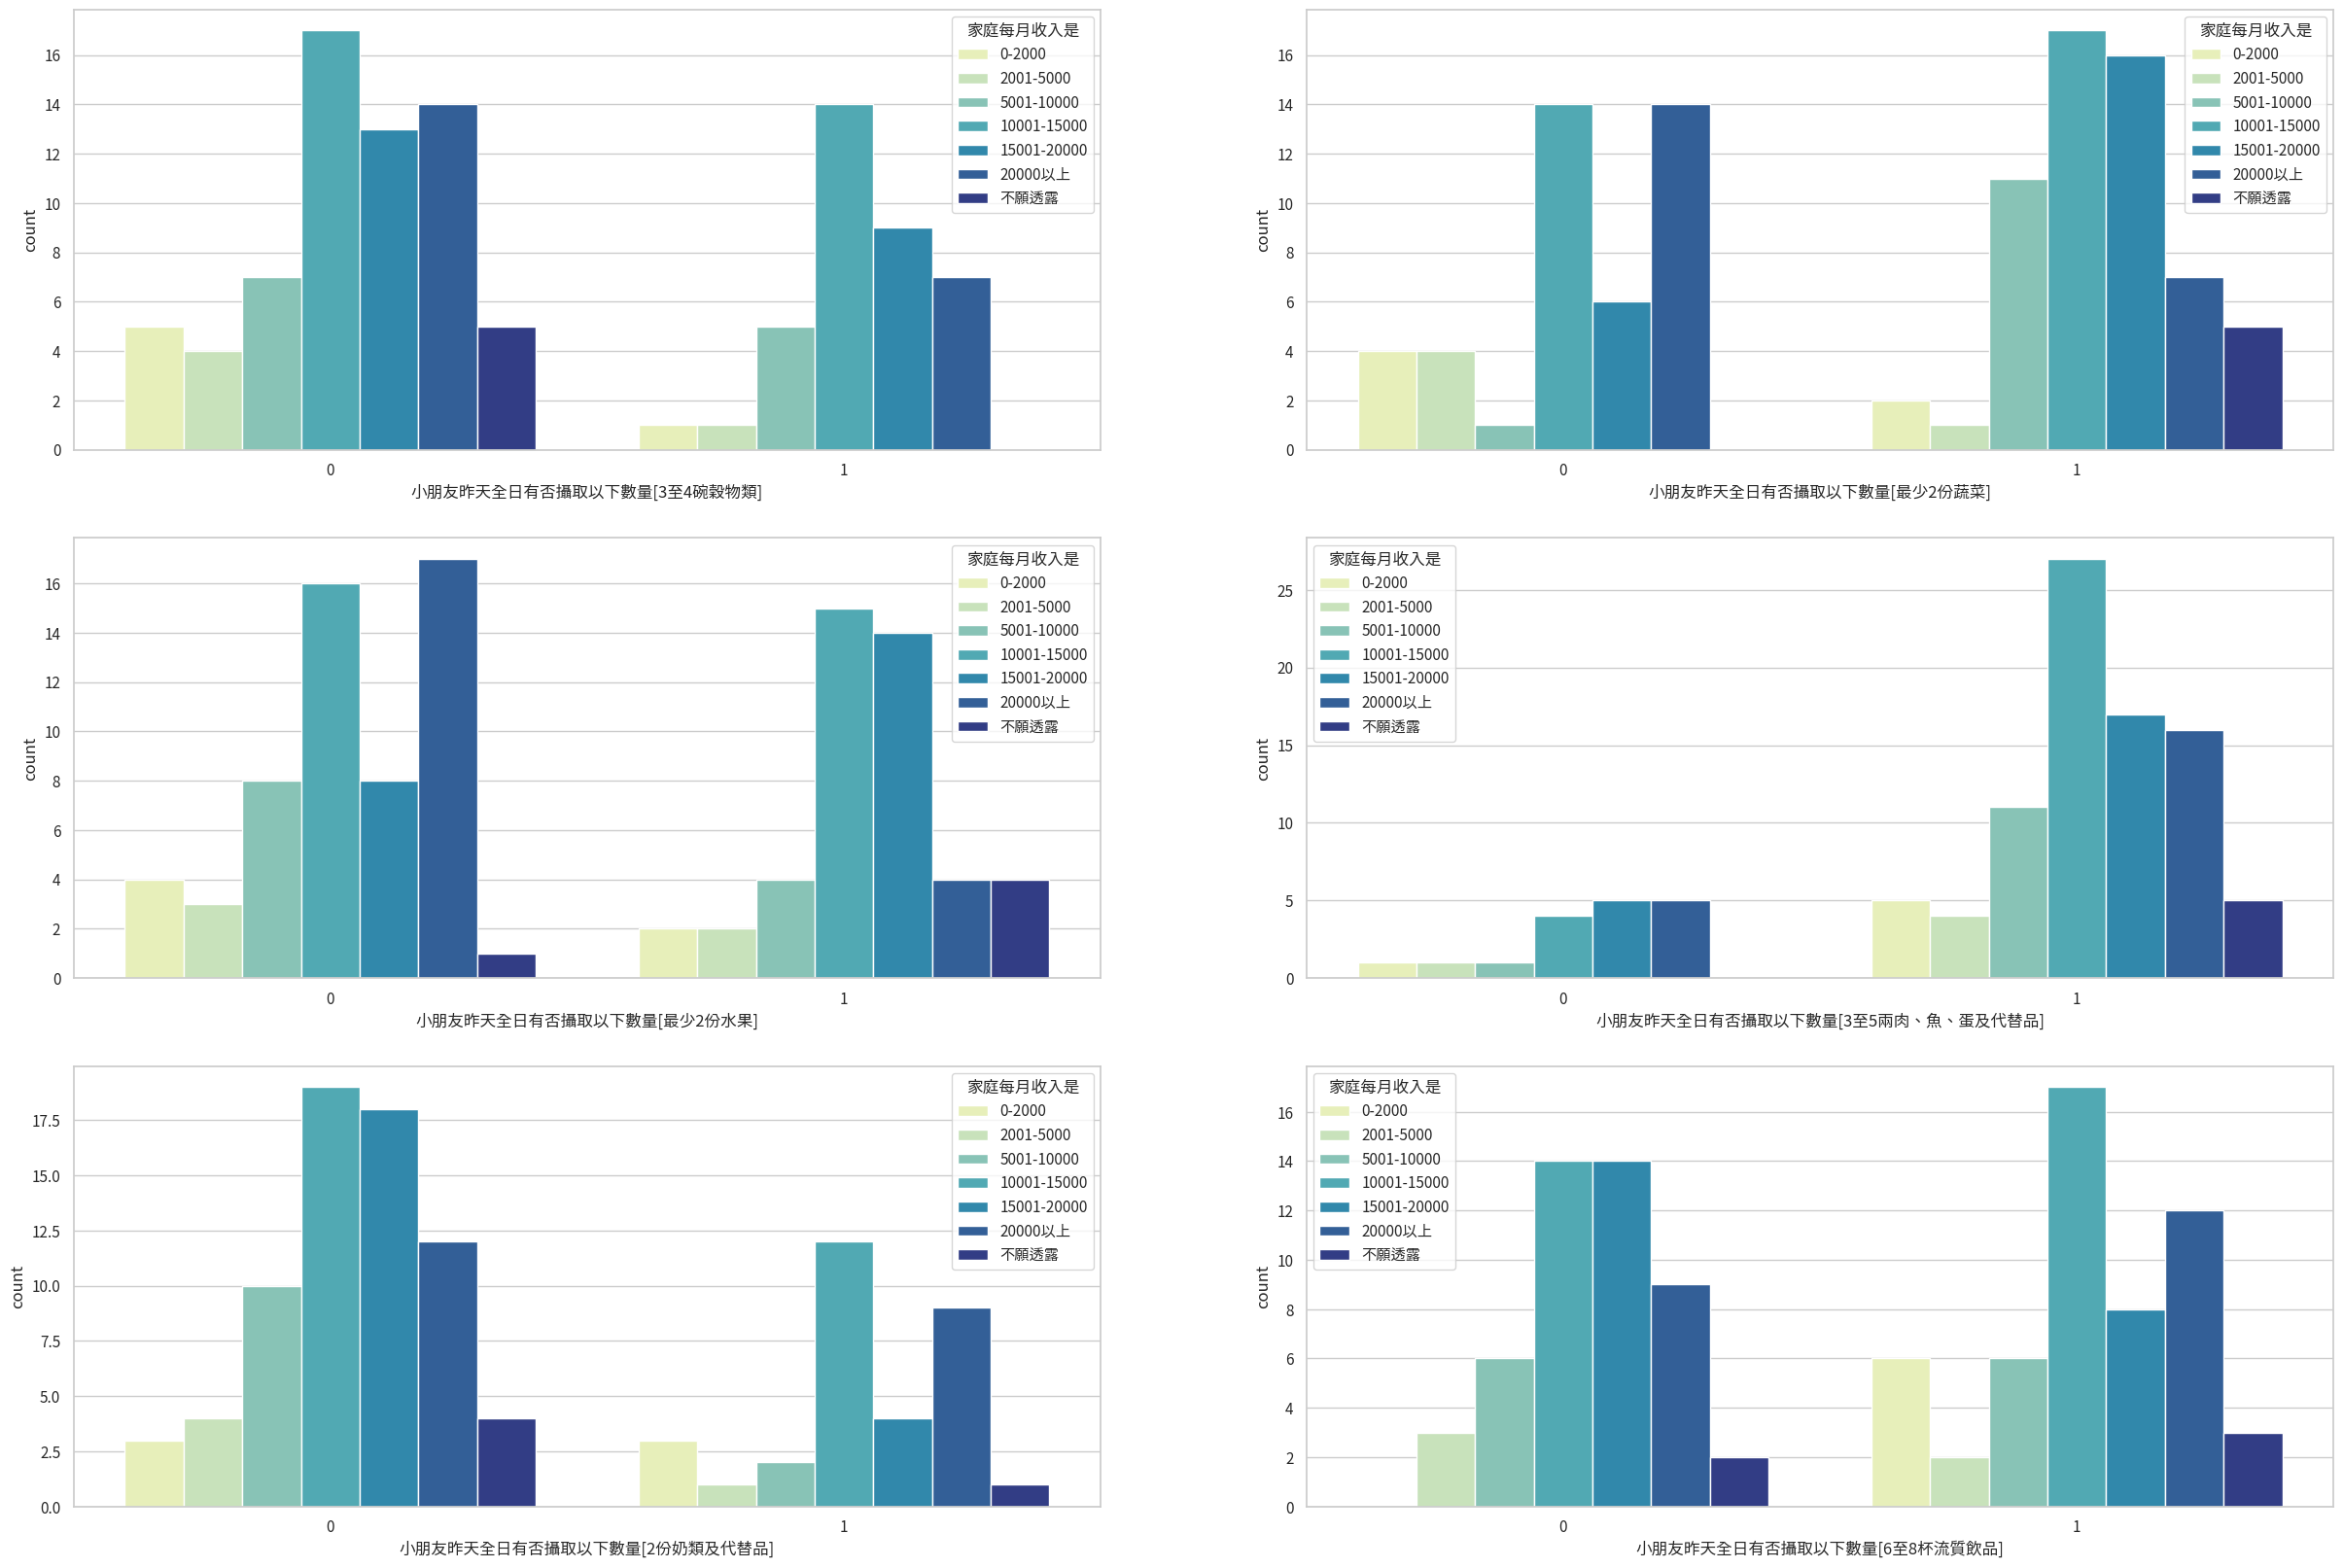

In [17]:
fig, axes = plt.subplots(3, 2, figsize = (30, 20))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['0-2000','2001-5000','5001-10000','10001-15000','15001-20000','20000以上','不願透露']

sns.countplot(ax = axes[0],x='小朋友昨天全日有否攝取以下數量[3至4碗穀物類]',hue='家庭每月收入是',hue_order=hue_order ,data=data,palette="YlGnBu")
sns.countplot(ax = axes[1],x='小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',hue='家庭每月收入是',hue_order=hue_order ,data=data,palette="YlGnBu")
sns.countplot(ax = axes[2],x='小朋友昨天全日有否攝取以下數量[最少2份水果]',hue='家庭每月收入是',hue_order=hue_order ,data=data,palette="YlGnBu")
sns.countplot(ax = axes[3],x='小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]',hue='家庭每月收入是',hue_order=hue_order ,data=data,palette="YlGnBu")
sns.countplot(ax = axes[4],x='小朋友昨天全日有否攝取以下數量[2份奶類及代替品]',hue='家庭每月收入是',hue_order=hue_order ,data=data,palette="YlGnBu")
sns.countplot(ax = axes[5],x='小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]',hue='家庭每月收入是',hue_order=hue_order ,data=data,palette="YlGnBu")

In [18]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

Text(0, 0.5, '數目')

<Figure size 2000x2500 with 0 Axes>

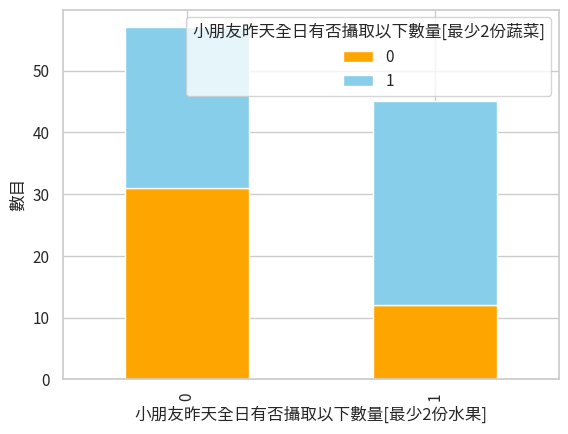

In [19]:
plt.figure(figsize=(20,25))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
df_plot = data.groupby(['小朋友昨天全日有否攝取以下數量[最少2份蔬菜]', '小朋友昨天全日有否攝取以下數量[最少2份水果]']).size().reset_index().pivot(columns='小朋友昨天全日有否攝取以下數量[最少2份蔬菜]', index='小朋友昨天全日有否攝取以下數量[最少2份水果]', values=0)
df_plot.plot(kind='bar', stacked=True,color=["orange",'skyblue'])
plt.ylabel("數目")

#sns.countplot(x=data["小朋友昨天全日有否攝取以下數量[最少2份蔬菜]"],hue=data['小朋友昨天全日有否攝取以下數量[最少2份水果]'],palette='YlGnBu',stacked=True).set_title(f"蔬菜與水果飲食習慣")

Text(0, 0.5, '數目')

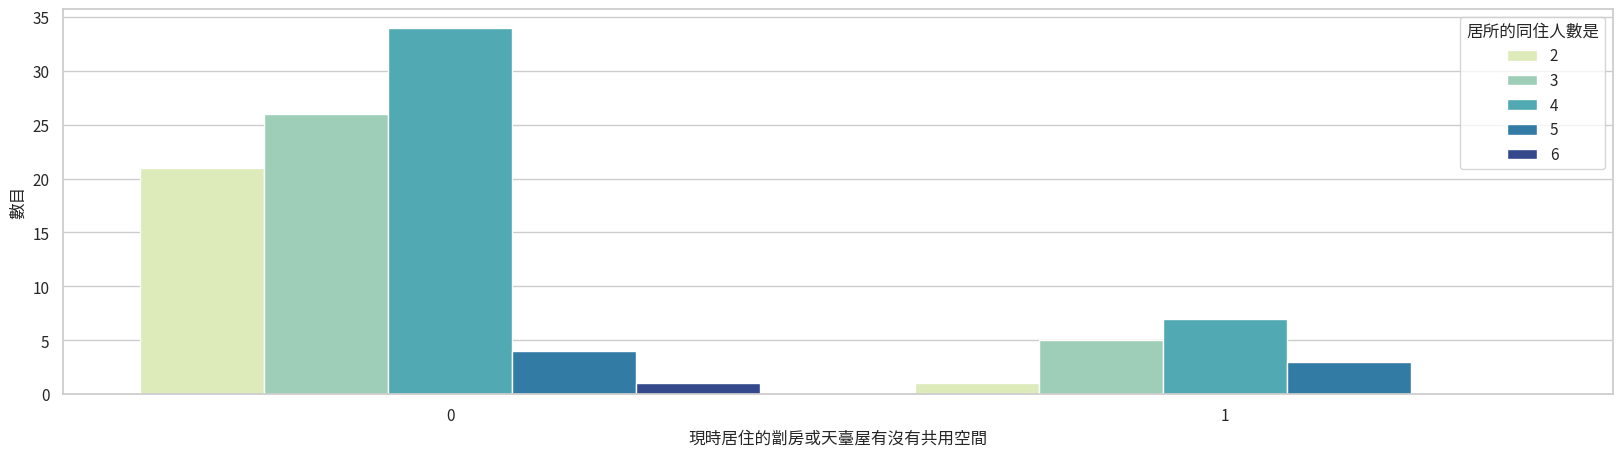

In [20]:
plt.figure(figsize=(20,5))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, x='現時居住的劏房或天臺屋有沒有共用空間',palette="YlGnBu",hue='居所的同住人數是')
plt.ylabel("數目")

In [21]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

Text(0.5, 1.0, '小朋友營養分數與家庭每月收入關係')

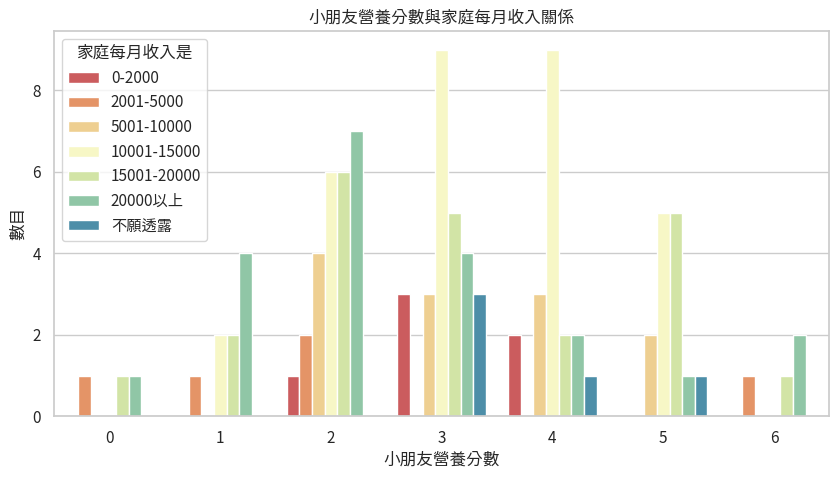

In [25]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['0-2000','2001-5000','5001-10000','10001-15000','15001-20000','20000以上','不願透露']
sns.countplot(x='小朋友營養分數',hue='家庭每月收入是',hue_order=hue_order ,data=data,palette="Spectral")
plt.ylabel("數目")
plt.title("小朋友營養分數與家庭每月收入關係")

Text(0.5, 1.0, '家庭每月收入與飲食方面支出的關係')

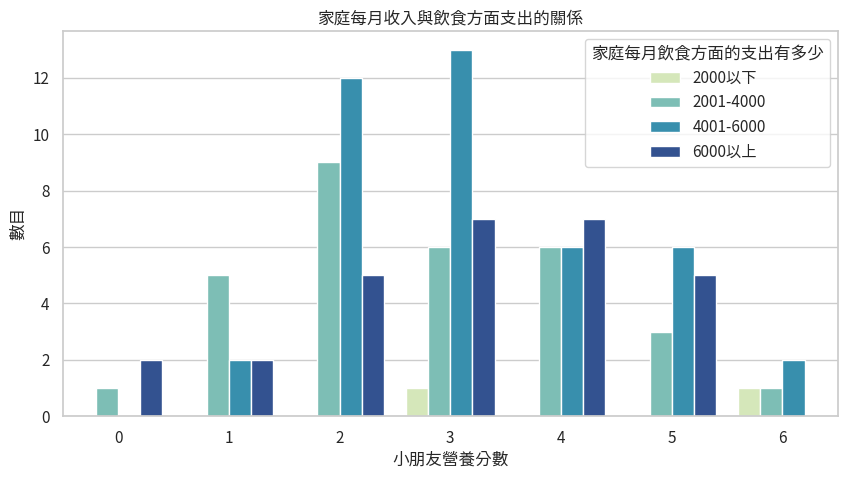

In [24]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
#order=['0-2000','2001-5000','5001-10000','10001-15000','15001-20000','20000以上','不願透露']
hue_order = ['2000以下','2001-4000','4001-6000','6000以上']
sns.countplot(x='小朋友營養分數',hue='家庭每月飲食方面的支出有多少' ,hue_order=hue_order ,data=data,palette="YlGnBu")
plt.ylabel("數目")
plt.title("家庭每月收入與飲食方面支出的關係")



Text(0, 0.5, '數目')

<Figure size 2000x2500 with 0 Axes>

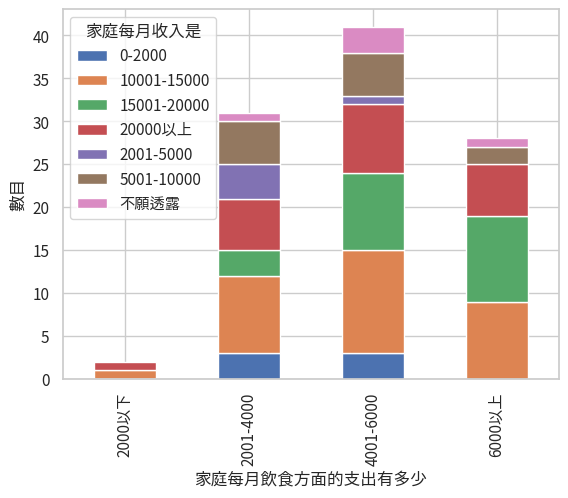

In [43]:
plt.figure(figsize=(20,25))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
df_plot = data.groupby(['家庭每月收入是','家庭每月飲食方面的支出有多少']).size().reset_index().pivot(columns='家庭每月收入是', index='家庭每月飲食方面的支出有多少', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.ylabel("數目")

In [41]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

Text(0.5, 1.0, '小朋友營養分數與受訪者教育程度關係')

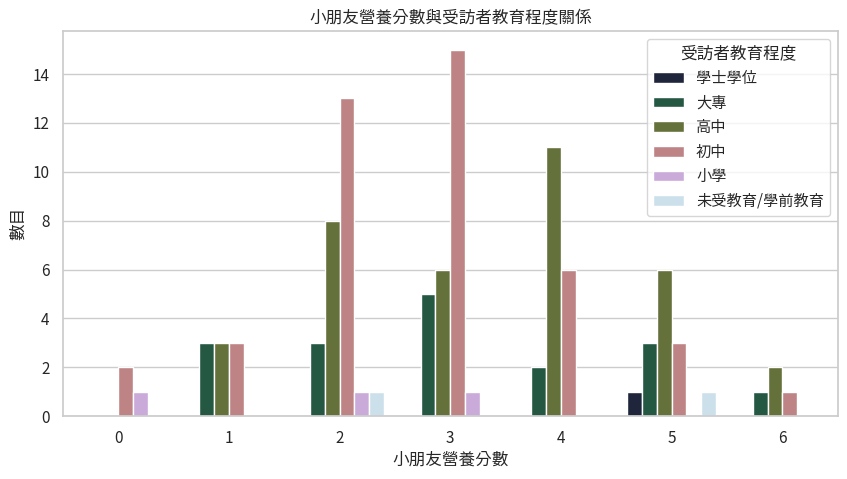

In [26]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['學士學位','大專','高中','初中','小學','未受教育/學前教育']
sns.countplot(x='小朋友營養分數',hue='受訪者教育程度',hue_order=hue_order ,data=data,palette="cubehelix")
plt.ylabel("數目")
plt.title("小朋友營養分數與受訪者教育程度關係")


Text(0.5, 0.98, '民社服務中心服務評分')

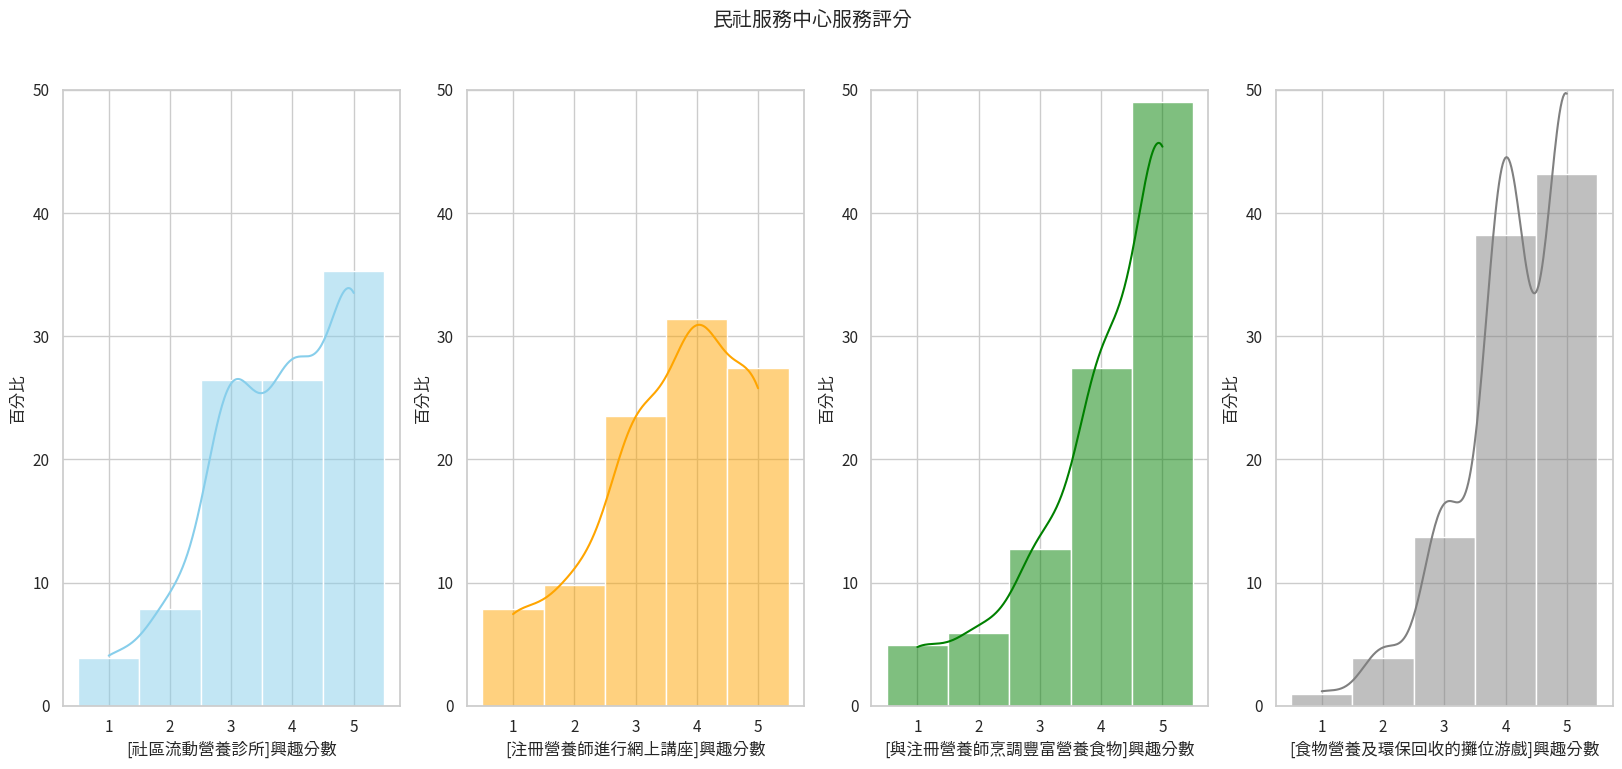

In [10]:
fig, axes = plt.subplots(1, 4, figsize = (20, 8))
sns.set_theme(style = "whitegrid")
axes = axes.flatten()

#sns.set(font_scale = 1.25)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

sns.histplot(ax = axes[0],data=data['[社區流動營養診所]興趣分數'], kde=True,color="skyblue",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 50))
sns.histplot(ax = axes[1],data=data['[注冊營養師進行網上講座]興趣分數'], kde=True,color="orange",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 50))
sns.histplot(ax = axes[2],data=data['[與注冊營養師烹調豐富營養食物]興趣分數'], kde=True, color="green",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 50))
sns.histplot(ax = axes[3],data=data['[食物營養及環保回收的攤位游戲]興趣分數'], kde=True, color="grey",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 50))
fig.suptitle('民社服務中心服務評分')


Text(0.5, 0.98, '煮食意欲的因素')

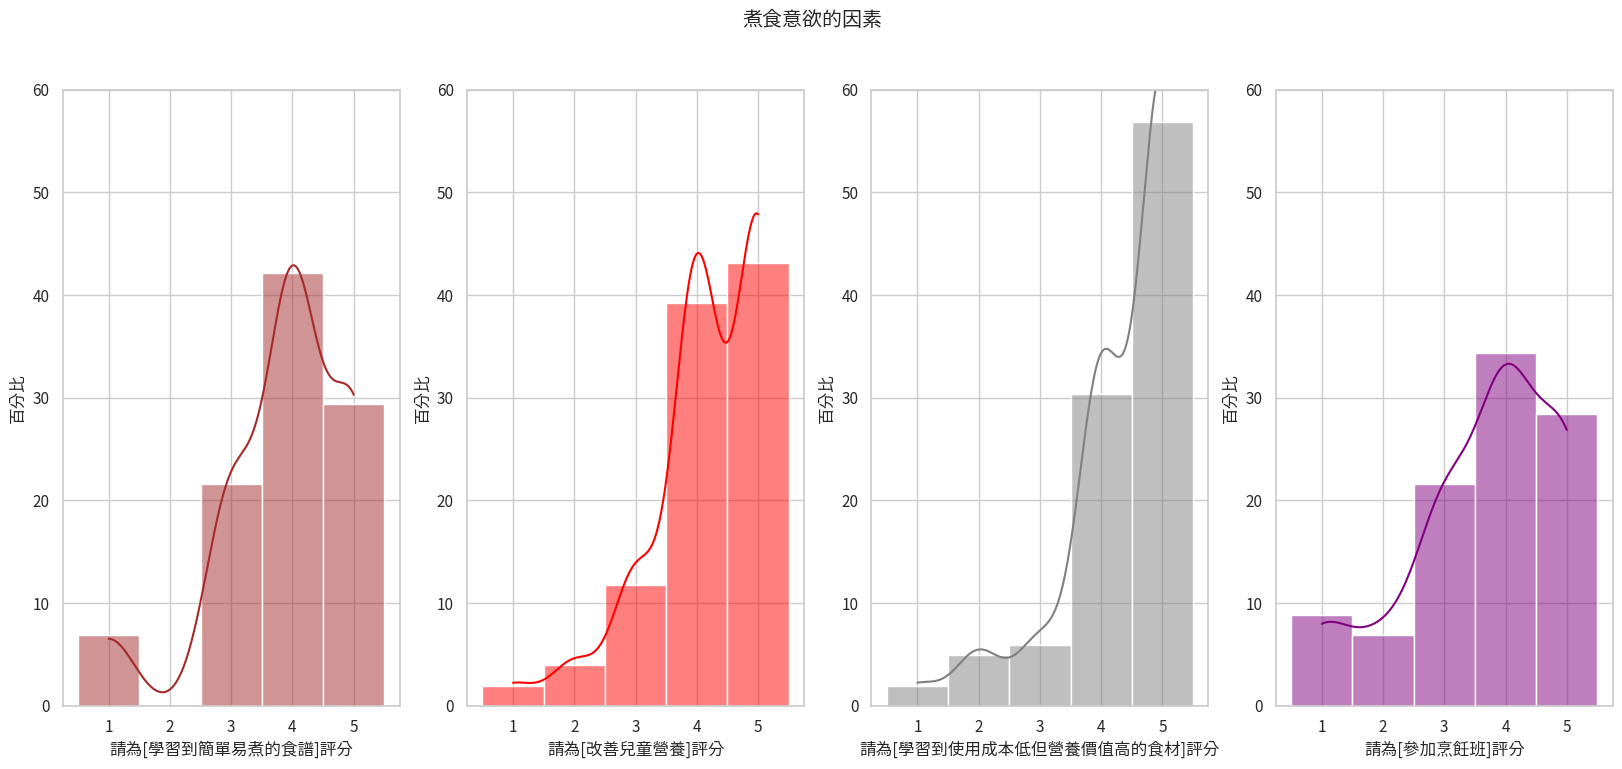

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (20, 8))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
#sns.set(font_scale = 1.25)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

sns.histplot(ax = axes[0],data=data['請為[學習到簡單易煮的食譜]評分'], kde=True,color="brown",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 60))
sns.histplot(ax = axes[1],data=data['請為[改善兒童營養]評分'], kde=True,color="red",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 60))
sns.histplot(ax = axes[2],data=data['請為[學習到使用成本低但營養價值高的食材]評分'], kde=True, color="grey",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 60))
sns.histplot(ax = axes[3],data=data['請為[參加烹飪班]評分'], kde=True, color="purple",discrete=True,stat='percent').set(ylabel = "百分比",ylim=(0, 60))
fig.suptitle('煮食意欲的因素')


<AxesSubplot:xlabel='家庭每月飲食方面的支出有多少', ylabel='count'>

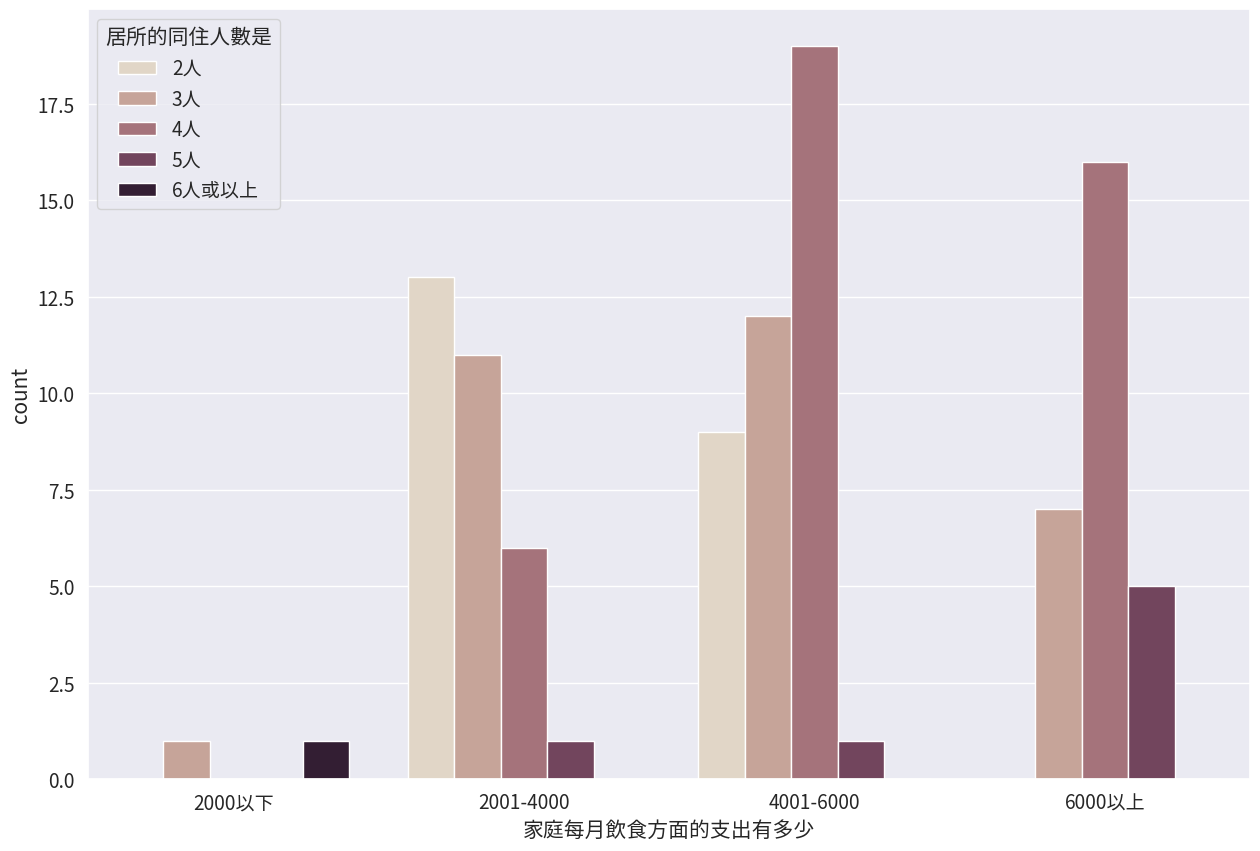

In [29]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['2人','3人','4人','5人','6人或以上']
sns.countplot(x='家庭每月飲食方面的支出有多少',hue='居所的同住人數是',order=['2000以下','2001-4000','4001-6000','6000以上'],hue_order=hue_order ,data=data,palette="ch:.25")

<Figure size 1500x1000 with 0 Axes>

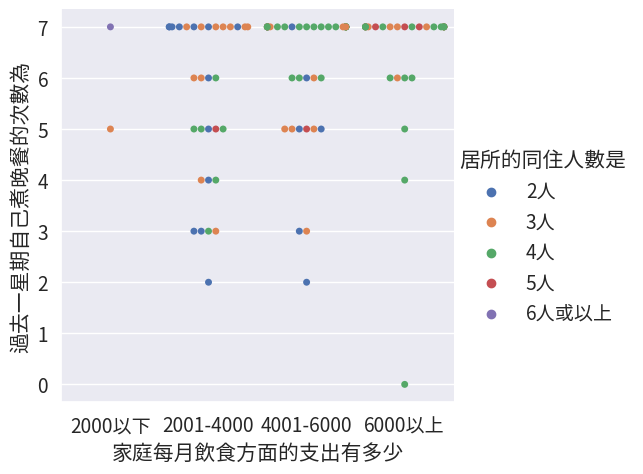

In [30]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['2人','3人','4人','5人','6人或以上']
sns.catplot(data=data, x="家庭每月飲食方面的支出有多少", y="過去一星期自己煮晚餐的次數為",kind="swarm", order=['2000以下','2001-4000','4001-6000','6000以上'],hue="居所的同住人數是",hue_order=hue_order)



<Figure size 1500x1000 with 0 Axes>

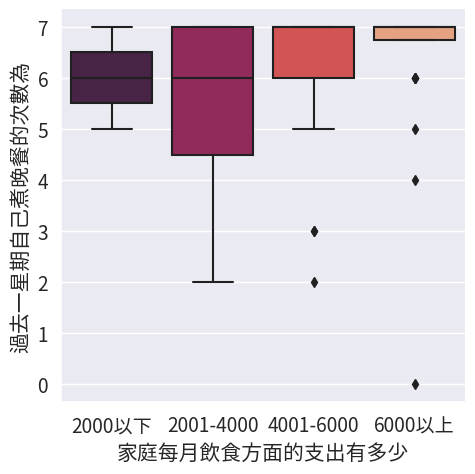

In [31]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
hue_order=['2人','3人','4人','5人','6人或以上']
sns.catplot(data=data, x="家庭每月飲食方面的支出有多少", y="過去一星期自己煮晚餐的次數為",kind="box",order=['2000以下','2001-4000','4001-6000','6000以上'],palette="rocket")

<Figure size 1500x1000 with 0 Axes>

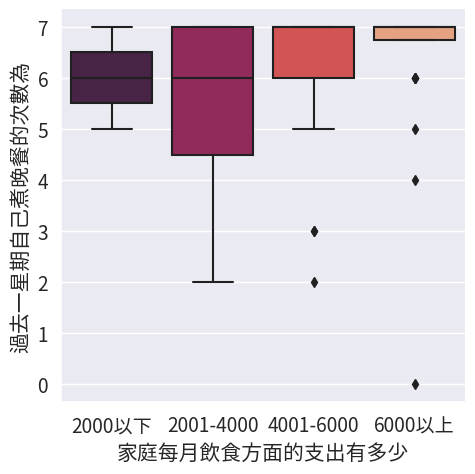

In [32]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.catplot(data=data, x="家庭每月飲食方面的支出有多少", y="過去一星期自己煮晚餐的次數為",kind="box",order=['2000以下','2001-4000','4001-6000','6000以上'],palette="rocket")

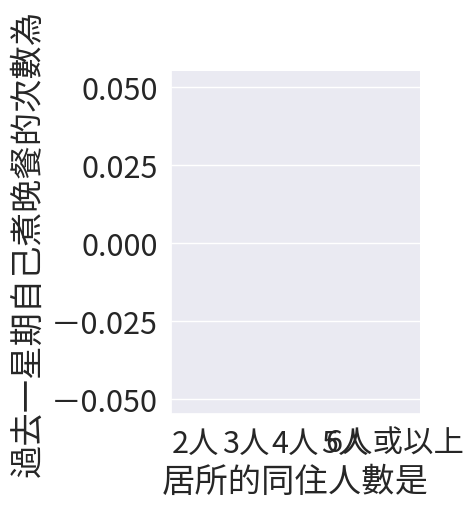

In [102]:

sns.catplot(
    data=data, y="過去一星期自己煮晚餐的次數為", x="居所的同住人數是",order=['2人','3人','4人','5人','6人或以上'],
    kind="point"
)

<Figure size 1500x1000 with 0 Axes>

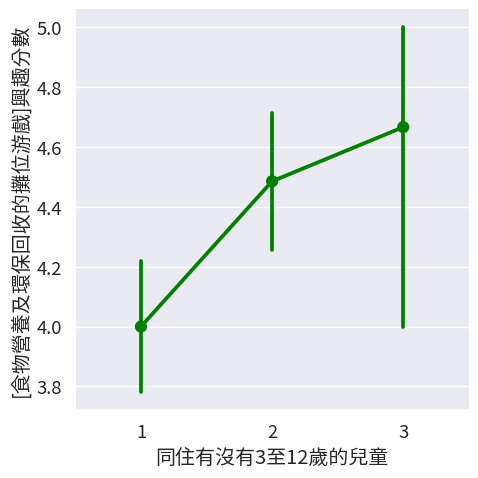

In [106]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y="[食物營養及環保回收的攤位游戲]興趣分數", x="同住有沒有3至12歲的兒童",order=[1,2,3],
    kind="point",color="green"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

<Figure size 1500x1000 with 0 Axes>

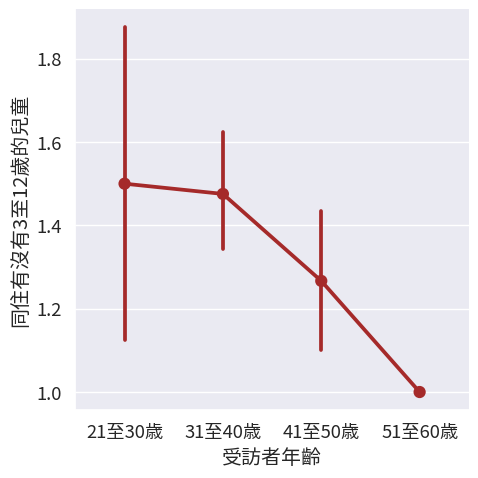

In [20]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y="同住有沒有3至12歲的兒童", x='受訪者年齡',order=['21至30歳','31至40歳','41至50歳','51至60歳'],
    kind="point",color="brown"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

<Figure size 1500x1000 with 0 Axes>

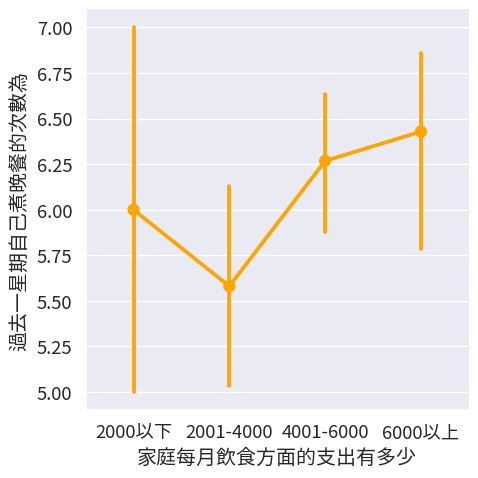

In [12]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y='過去一星期自己煮晚餐的次數為', x='家庭每月飲食方面的支出有多少',order=['2000以下','2001-4000','4001-6000','6000以上'],
    kind="point",color="orange"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

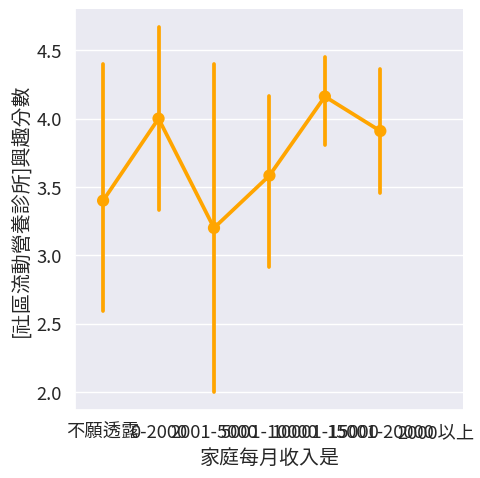

In [16]:
#plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y='[社區流動營養診所]興趣分數', x='家庭每月收入是',order=['不願透露','0-2000','2001-5000','5001-10000','10001-15000','15001-20000','2000以上'],
    kind="point",color="orange"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

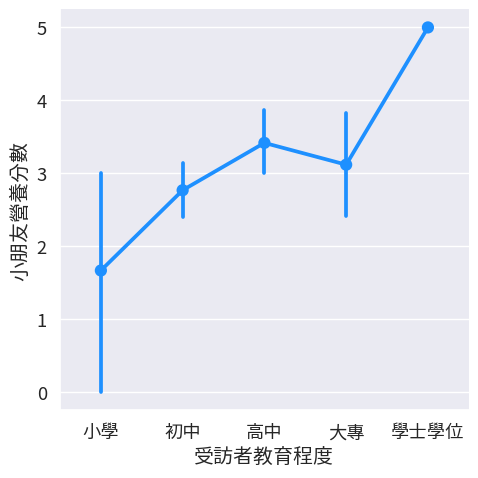

In [21]:
#plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y='小朋友營養分數', x='受訪者教育程度',order=['小學','初中','高中','大專','學士學位'],
    kind="point",color='dodgerblue'
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [7]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

<Figure size 1500x1000 with 0 Axes>

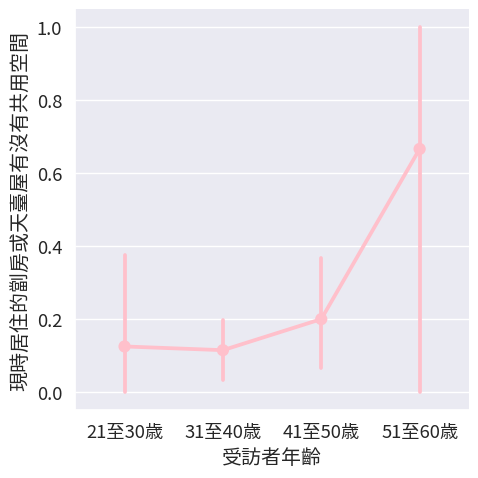

In [28]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y='現時居住的劏房或天臺屋有沒有共用空間', x='受訪者年齡',order=['21至30歳','31至40歳','41至50歳','51至60歳'],
    kind="point",color="pink"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

<Figure size 1500x1000 with 0 Axes>

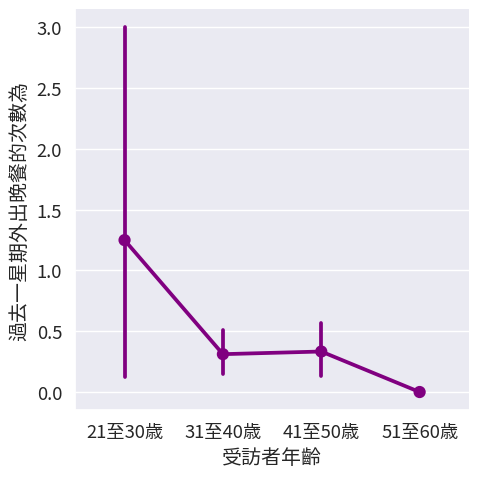

In [27]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y='過去一星期外出晚餐的次數為', x='受訪者年齡',order=['21至30歳','31至40歳','41至50歳','51至60歳'],
    kind="point",color="purple"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

<Figure size 1500x1000 with 0 Axes>

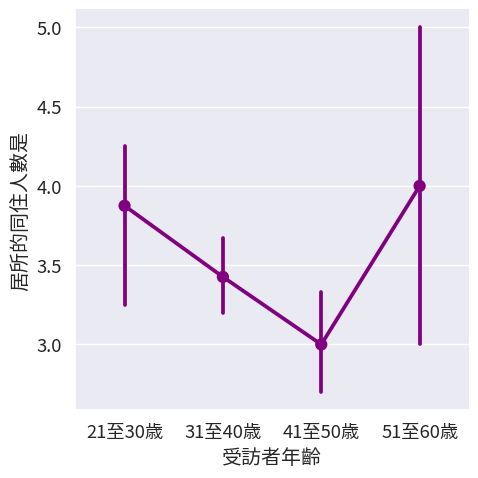

In [18]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y='居所的同住人數是', x='受訪者年齡',order=['21至30歳','31至40歳','41至50歳','51至60歳'],
    kind="point",color="purple"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

<Figure size 1500x1000 with 0 Axes>

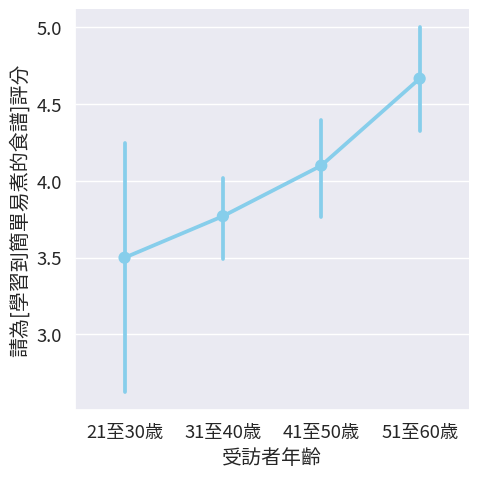

In [33]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.2)
sns.catplot(
    data=data, y='請為[學習到簡單易煮的食譜]評分', x='受訪者年齡',order=['21至30歳','31至40歳','41至50歳','51至60歳'],
    kind="point",color="skyblue"
)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

Text(0, 0.5, '數目')

<Figure size 2000x2500 with 0 Axes>

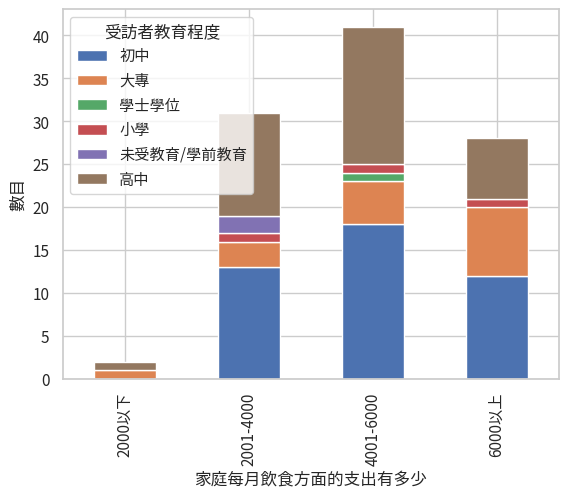

In [26]:

plt.figure(figsize=(20,25))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
df_plot = data.groupby(['受訪者教育程度', '家庭每月飲食方面的支出有多少']).size().reset_index().pivot(columns='受訪者教育程度', index='家庭每月飲食方面的支出有多少', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.ylabel("數目")

#sns.countplot(x=data["小朋友昨天全日有否攝取以下數量[最少2份蔬菜]"],hue=data['小朋友昨天全日有否攝取以下數量[最少2份水果]'],palette='YlGnBu',stacked=True).set_title(f"蔬菜與水果飲食習慣")

Text(0, 0.5, '數目')

<Figure size 2000x2500 with 0 Axes>

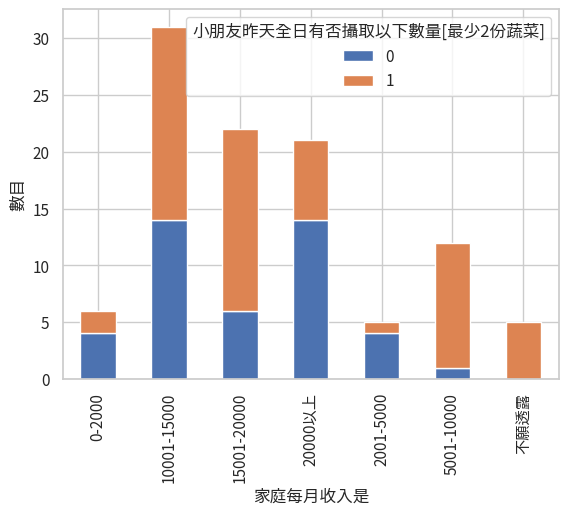

In [32]:

plt.figure(figsize=(20,25))
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
df_plot = data.groupby(['小朋友昨天全日有否攝取以下數量[最少2份蔬菜]', '家庭每月收入是']).size().reset_index().pivot(columns='小朋友昨天全日有否攝取以下數量[最少2份蔬菜]', index='家庭每月收入是', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.ylabel("數目")

#sns.countplot(x=data["小朋友昨天全日有否攝取以下數量[最少2份蔬菜]"],hue=data['小朋友昨天全日有否攝取以下數量[最少2份水果]'],palette='YlGnBu',stacked=True).set_title(f"蔬菜與水果飲食習慣")

In [95]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

In [34]:
import plotly.express as px
data_temp = data['過去一星期有外出用膳或外賣的原因'].dropna()
fig = px.pie(data_temp, names='過去一星期有外出用膳或外賣的原因', title='過去一星期有外出用膳或外賣的原因')
fig.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\ProgramData\Anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [36]:
ttt

0            1                 2     3            4
0      沒有時間           太累              None  None         None
1       NaN          NaN               NaN   NaN          NaN
2       NaN          NaN               NaN   NaN          NaN
3      空間有限         油煙太大  外賣或外出用膳與自己煮食成本相若  沒有時間  外賣或外出用膳比較方便
4        太累         None              None  None         None
..      ...          ...               ...   ...          ...
97      不想煮  外賣或外出用膳比較方便              None  None         None
98       疫情         None              None  None         None
99   要照顧小朋友         沒有時間              None  None         None
100     NaN          NaN               NaN   NaN          NaN
101     NaN          NaN               NaN   NaN          NaN

[102 rows x 5 columns]

In [ ]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

Text(0.5, 1.0, '沒有攝取3至4碗穀物類原因')

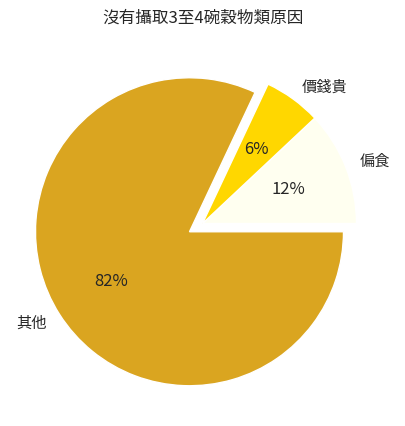

In [13]:
plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = ['ivory',"gold","goldenrod", "darkgoldenrod",'cornsilk','darkkhaki','khaki']
explode = [0,0,0.1]
data['沒有攝取3至4碗穀物類原因'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,explode=explode,colors=colors)
plt.ylabel("")
plt.title("沒有攝取3至4碗穀物類原因")

Text(0.5, 1.0, '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]')

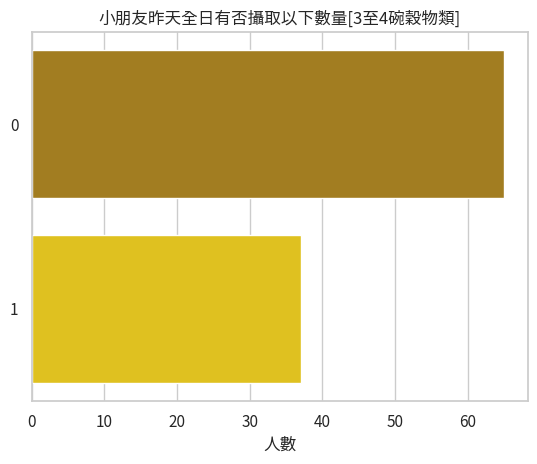

In [30]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, y='小朋友昨天全日有否攝取以下數量[3至4碗穀物類]',palette=['darkgoldenrod',"gold"])
plt.xlabel("人數")
plt.ylabel("")
plt.title("小朋友昨天全日有否攝取以下數量[3至4碗穀物類]")

In [24]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

Text(0.5, 1.0, '沒有吃3至4碗穀物類的其他原因是')

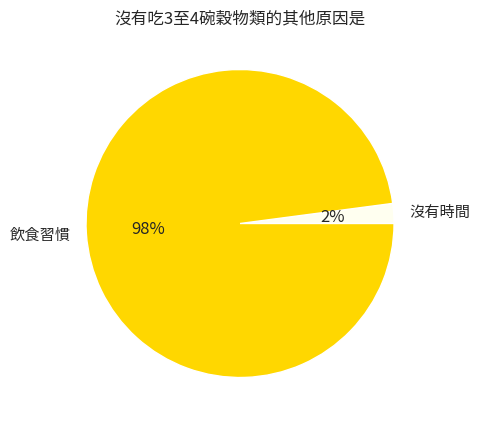

In [25]:
plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = ['ivory',"gold","goldenrod", "darkgoldenrod",'cornsilk','darkkhaki','khaki']
#explode = [0,0,0.1]
data['沒有吃3至4碗穀物類的其他原因是'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors)
plt.ylabel("")
plt.title('沒有吃3至4碗穀物類的其他原因是')

Text(0.5, 1.0, '沒有攝取最少2份蔬菜原因')

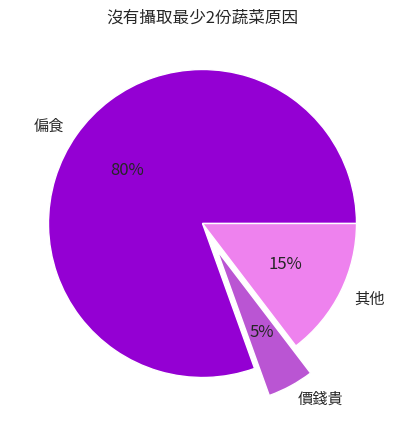

In [14]:
ttt =data['沒有攝取最少2份蔬菜原因'].str.split(',', 1, expand=True)
testpie = pd.concat([ttt[0],ttt[1]],axis=0)
plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = ['darkviolet', 'mediumorchid', 'violet', 'thistle',"mediumvioletred"]
explode = [0,0.2,0]
testpie.str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
#data['沒有攝取最少2份蔬菜原因'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("沒有攝取最少2份蔬菜原因")

Text(0.5, 1.0, '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]')

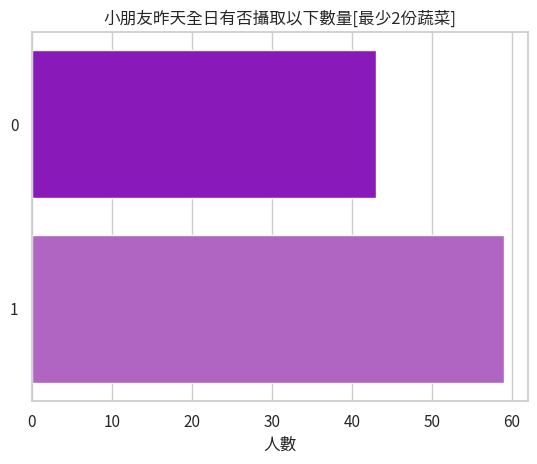

In [31]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, y='小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',palette=['darkviolet', 'mediumorchid', 'violet', 'thistle',"mediumvioletred"])
plt.xlabel("人數")
plt.ylabel("")
plt.title("小朋友昨天全日有否攝取以下數量[最少2份蔬菜]")

Text(0.5, 1.0, '沒有攝取最少2份水果原因')

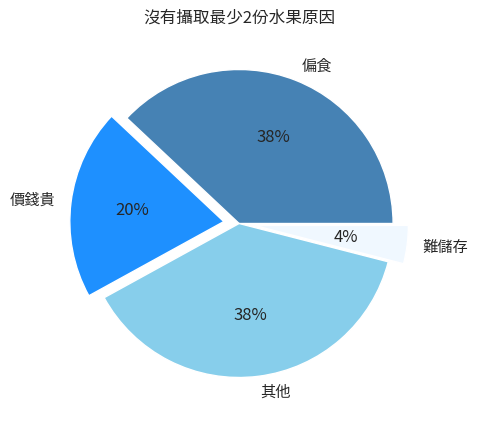

In [15]:
ttt =data['沒有攝取最少2份水果原因'].str.split(',', 1, expand=True)
testpie = pd.concat([ttt[0],ttt[1]],axis=0)
plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = ['steelblue', 'dodgerblue', 'skyblue', 'aliceblue',"aqua","teal"]
explode = [0,0.1,0,0.1]
testpie.str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
#data['沒有攝取最少2份水果原因'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("沒有攝取最少2份水果原因")

Text(0.5, 1.0, '小朋友昨天全日有否攝取以下數量[最少2份水果]')

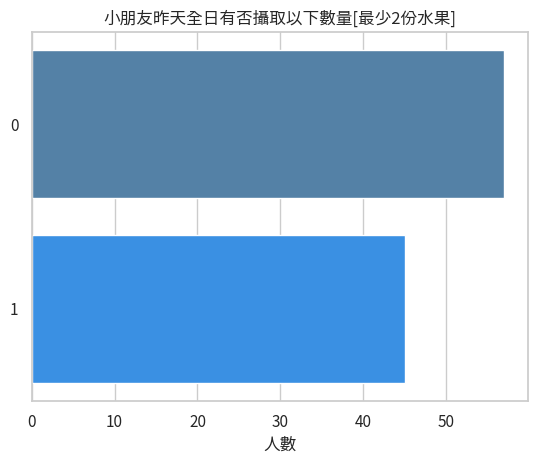

In [32]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, y='小朋友昨天全日有否攝取以下數量[最少2份水果]',palette=['steelblue', 'dodgerblue', 'skyblue', 'aliceblue',"aqua","teal"])
plt.xlabel("人數")
plt.ylabel("")
plt.title("小朋友昨天全日有否攝取以下數量[最少2份水果]")

Text(0.5, 1.0, '沒有攝取3至5兩肉、魚、蛋及代替品原因')

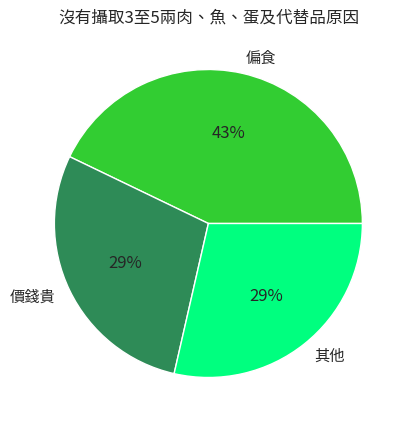

In [16]:
plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = ['limegreen', 'seagreen', 'springgreen']
explode = (0,0, 0,)
data['沒有攝取3至5兩肉、魚、蛋及代替品原因'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("沒有攝取3至5兩肉、魚、蛋及代替品原因")

Text(0.5, 1.0, '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]')

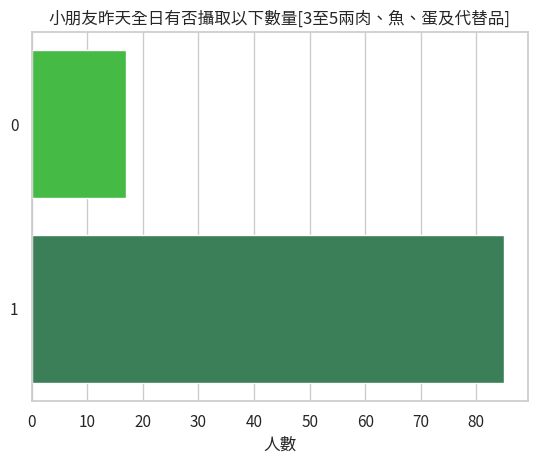

In [33]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, y='小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]',palette=['limegreen', 'seagreen', 'springgreen'])
plt.xlabel("人數")
plt.ylabel("")
plt.title("小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]")

Text(0.5, 1.0, '沒有攝取2份奶類及代替品原因')

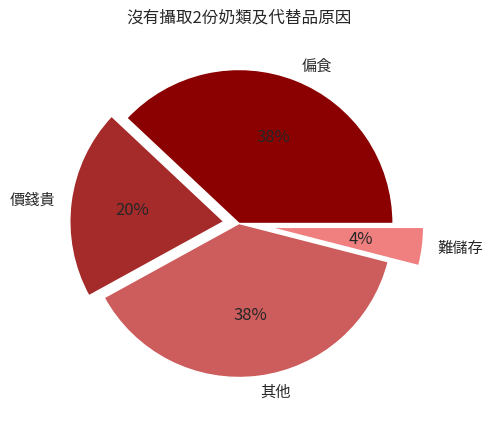

In [17]:
ttt =data['沒有攝取最少2份水果原因'].str.split(',', 1, expand=True)
testpie = pd.concat([ttt[0],ttt[1]],axis=0)
plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = [ 'darkred','brown', 'indianred','lightcoral','red','salmon','tomato']
explode = (0,0.1,0,0.2)
testpie.str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
#data['沒有攝取2份奶類及代替品原因'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("沒有攝取2份奶類及代替品原因")

Text(0.5, 1.0, '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]')

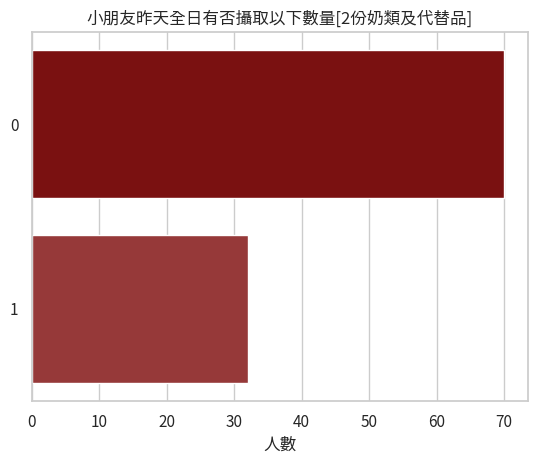

In [34]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, y='小朋友昨天全日有否攝取以下數量[2份奶類及代替品]',palette=[ 'darkred','brown', 'indianred','lightcoral','red','salmon','tomato'])
plt.xlabel("人數")
plt.ylabel("")
plt.title("小朋友昨天全日有否攝取以下數量[2份奶類及代替品]")

Text(0.5, 1.0, '沒有攝取6至8杯流質飲品原因')

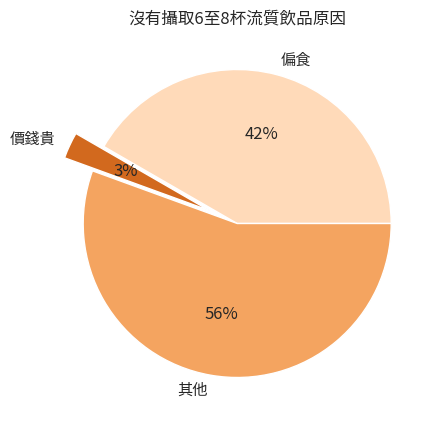

In [18]:
plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = [ 'peachpuff', 'chocolate','sandybrown']
explode = (0, 0.2, 0)
data['沒有攝取6至8杯流質飲品原因'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("沒有攝取6至8杯流質飲品原因")

Text(0.5, 1.0, '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]')

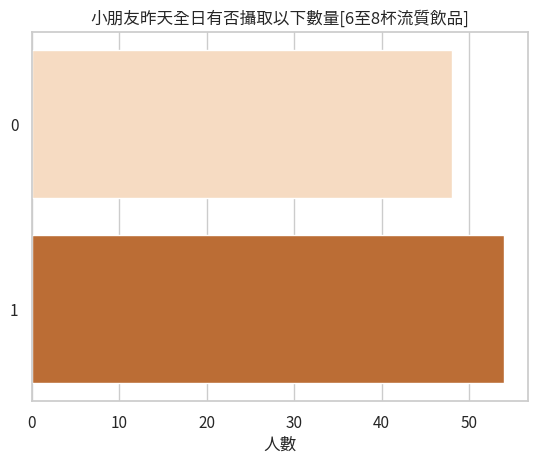

In [35]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.countplot(data=data, y='小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]',palette=[ 'peachpuff', 'chocolate','sandybrown'])
plt.xlabel("人數")
plt.ylabel("")
plt.title("小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]")

Text(0.5, 1.0, '昨晚晚餐有沒有以下類別')

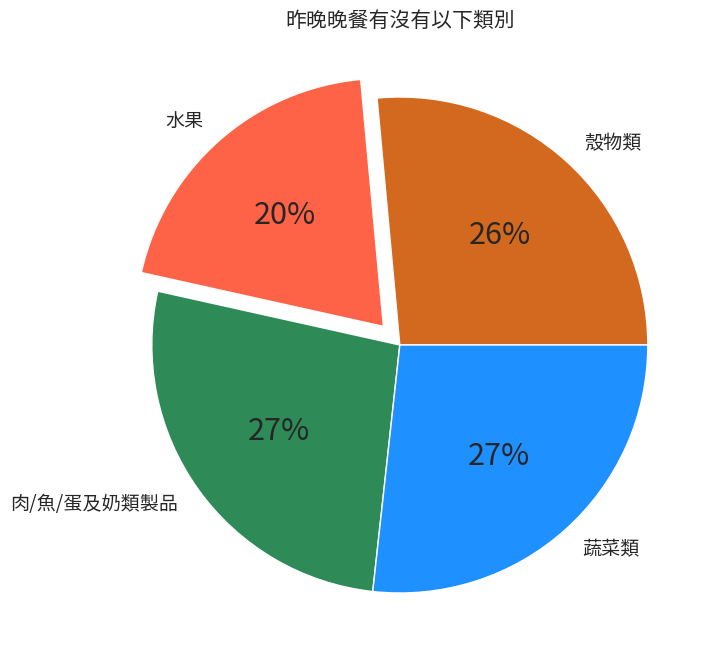

In [ ]:
piedin = pd.read_csv('HealthData.csv')
ttt = piedin['昨晚晚餐有沒有以下類別'].str.split(',',  expand=True)
testpie = pd.concat([ttt[0],ttt[1],ttt[2],ttt[3]],axis=0)
plt.figure(figsize=(8,10))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
colors = ['chocolate','tomato','seagreen','dodgerblue']
explode = (0,0.1,0,0)
testpie.str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
#data['沒有攝取2份奶類及代替品原因'].str.get_dummies().sum().plot.pie(autopct='%.0f%%',label=False,colors=colors,explode=explode)
plt.ylabel("")
plt.title("昨晚晚餐有沒有以下類別")

In [36]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

In [38]:
data['過去一星期自己煮晚餐的次數為'].mean()

6.098039215686274

In [39]:
data['過去一星期外出晚餐的次數為'].mean()

0.38235294117647056

In [40]:
data['過去一星期外賣晚餐的次數為'].mean()

0.5294117647058824

In [ ]:
testpie.str.get_dummies().sum()

殼物類           95
水果            72
肉/魚/蛋及奶類製品    96
蔬菜類           96
dtype: int64

In [ ]:
data = pd.read_csv('Question.csv')
ap = data[['受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收入是','家庭每月飲食方面的支出有多少']]

In [ ]:
ap = ap.to_numpy()
te = TransactionEncoder()
te_ary = te.fit(ap).transform(ap)
apap_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(apap_df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length']>=2)&(frequent_itemsets['support']>=0.4)]

support     itemsets  length
11  0.588235  (女, 31至40歳)       2
15  0.401961      (初中, 女)       2

In [39]:
data['小朋友營養分數'] = data['小朋友昨天全日有否攝取以下數量[3至4碗穀物類]'] + data['小朋友昨天全日有否攝取以下數量[最少2份蔬菜]'] + data['小朋友昨天全日有否攝取以下數量[最少2份水果]'] + data['小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]'] + data['小朋友昨天全日有否攝取以下數量[2份奶類及代替品]'] + data['小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]']

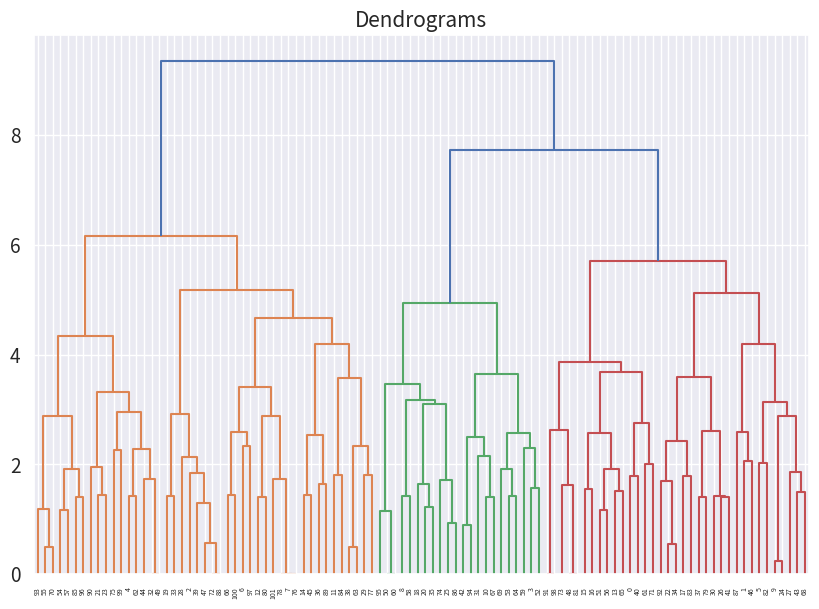

In [65]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
X=data[['家庭每月飲食方面的支出有多少','受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收入是']]
X=pd.get_dummies(X)
Y =data[['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為',]]
G = pd.concat([X,Y],axis=1)
MinMax = MinMaxScaler()
G_std = pd.DataFrame(MinMax.fit_transform(G),columns = G.columns)
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(G_std, method='ward'))

In [66]:
G_std

家庭每月飲食方面的支出有多少_2000以下  家庭每月飲食方面的支出有多少_2001-4000  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       1.0   
4                      0.0                       1.0   
..                     ...                       ...   
97                     0.0                       0.0   
98                     0.0                       0.0   
99                     0.0                       1.0   
100                    0.0                       0.0   
101                    0.0                       0.0   

     家庭每月飲食方面的支出有多少_4001-6000  家庭每月飲食方面的支出有多少_6000以上  受訪者性別_女  受訪者性別_男  \
0                         1.0                    0.0      1.0      0.0   
1                         0.0                    1.0      1.0      0.0   
2                         1.0                    0.0      1.0      0.0   
3                         0.0                    0.0      1.0      0.0   
4                         0.0                    0.0      1.0      0.0   
..                        ...                    ...      ...      ...   
97                        0.0                    1.0      1.0      0.0   
98                        0.0                    1.0      1.0      0.0   
99                        0.0                    0.0      1.0      0.0   
100                       0.0                    1.0      1.0      0.0   
101                       0.0                    1.0      1.0      0.0   

     受訪者年齡_21至30歳  受訪者年齡_31至40歳  受訪者年齡_41至50歳  受訪者年齡_51至60歳  ...  \
0             0.0           0.0           1.0           0.0  ...   
1             0.0           0.0           1.0           0.0  ...   
2             0.0           1.0           0.0           0.0  ...   
3             0.0           0.0           1.0           0.0  ...   
4             0.0           0.0           1.0           0.0  ...   
..            ...           ...           ...           ...  ...   
97            1.0           0.0           0.0           0.0  ...   
98            0.0           1.0           0.0           0.0  ...   
99            0.0           1.0           0.0           0.0  ...   
100           0.0           0.0           1.0           0.0  ...   
101           0.0           1.0           0.0           0.0  ...   

     家庭每月收入是_15001-20000  家庭每月收入是_20000以上  家庭每月收入是_2001-5000  \
0                    0.0              0.0                0.0   
1                    1.0              0.0                0.0   
2                    0.0              0.0                0.0   
3                    0.0              0.0                0.0   
4                    0.0              1.0                0.0   
..                   ...              ...                ...   
97                   0.0              1.0                0.0   
98                   0.0              0.0                0.0   
99                   0.0              1.0                0.0   
100                  0.0              1.0                0.0   
101                  1.0              0.0                0.0   

     家庭每月收入是_5001-10000  家庭每月收入是_不願透露  同住有沒有3至12歲的兒童  現時居住的劏房或天臺屋有沒有共用空間  \
0                   0.0           1.0            0.5                 0.0   
1                   0.0           0.0            0.5                 1.0   
2                   0.0           1.0            0.0                 0.0   
3                   0.0           0.0            0.0                 0.0   
4                   0.0           0.0            0.5                 0.0   
..                  ...           ...            ...                 ...   
97                  0.0           0.0            0.5                 0.0   
98                  1.0           0.0            0.0                 0.0   
99                  0.0           0.0            0.0                 0.0   
100                 0.0           0.0            0.0                 0.0   
101                 0

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
data['HierCluster'] = cluster.fit_predict(G_std)
data['HierCluster'] = data['HierCluster'] + 1

In [43]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

In [44]:
Cluster_data = data[['HierCluster','受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收入是','同住有沒有3至12歲的兒童','[社區流動營養診所]興趣分數','家庭每月飲食方面的支出有多少',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數','請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分','請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分']]

In [45]:
Cluster_data.groupby(['HierCluster'])['HierCluster'].count()

HierCluster
1    45
2    35
3    22
Name: HierCluster, dtype: int64

In [46]:
View = Cluster_data[['HierCluster','受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收入是','同住有沒有3至12歲的兒童','家庭每月飲食方面的支出有多少']]
View.groupby(['HierCluster']).agg(pd.Series.mode)

受訪者性別   受訪者年齡 受訪者教育程度 居所的同住人數是      家庭每月收入是  同住有沒有3至12歲的兒童  \
HierCluster                                                              
1               女  31至40歳      初中       4人      20000以上              2   
2               女  31至40歳      初中       3人  10001-15000              1   
3               女  31至40歳      初中       2人  10001-15000              1   

            家庭每月飲食方面的支出有多少  
HierCluster                 
1                4001-6000  
2                4001-6000  
3                2001-4000

In [47]:
View2 = Cluster_data[['HierCluster','[社區流動營養診所]興趣分數','[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數']]
View2.groupby(['HierCluster']).agg(pd.Series.mean)

[社區流動營養診所]興趣分數  [注冊營養師進行網上講座]興趣分數  [與注冊營養師烹調豐富營養食物]興趣分數  \
HierCluster                                                            
1                  3.777778           3.733333              4.000000   
2                  3.885714           3.371429              4.142857   
3                  3.772727           3.727273              4.227273   

             [食物營養及環保回收的攤位游戲]興趣分數  
HierCluster                        
1                        4.333333  
2                        4.028571  
3                        4.136364

In [48]:
View3 = Cluster_data[['HierCluster','請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分','請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分',]]
View3.groupby(['HierCluster']).agg(pd.Series.mean)

請為[學習到簡單易煮的食譜]評分  請為[改善兒童營養]評分  請為[學習到使用成本低但營養價值高的食材]評分  \
HierCluster                                                            
1                    3.933333      4.288889                 4.444444   
2                    3.828571      4.142857                 4.285714   
3                    3.818182      4.000000                 4.272727   

             請為[參加烹飪班]評分  
HierCluster               
1               3.666667  
2               3.628571  
3               3.727273

In [49]:
data.columns


Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

In [11]:
def chiTest(df1,df2):
    data_crosstab = pd.crosstab(df1,
                                df2,
                                margins=True, margins_name="Total")
    alpha = 0.05
    chi_square = 0
    rows = df1.unique()
    columns = df2.unique()
    for i in columns:
        for j in rows:
            O = data_crosstab[i][j]
            E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
            chi_square += (O-E)**2/E

    print("The p-value approach to hypothesis testing in the decision rule")
    p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
    conclusion = "Failed to reject the null hypothesis."
    if p_value <= alpha:
        conclusion = "Null Hypothesis is rejected."
        
    print("chisquare-score is:", chi_square, "and p value is:", p_value)
    print(conclusion)

In [13]:
chiTest(data['受訪者教育程度'],data['小朋友營養分數'])

The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 34.12491400435096 and p value is: 0.2758663725165147
Failed to reject the null hypothesis.


In [52]:
data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收

In [62]:
    data_crosstab = pd.crosstab(data['家庭每月飲食方面的支出有多少'],data['小朋友營養分數'],margins=True, margins_name="Total")

In [63]:
data_crosstab

小朋友營養分數         0  1   2   3   4   5  6  Total
家庭每月飲食方面的支出有多少                                
2000以下          0  0   0   1   0   0  1      2
2001-4000       1  5   9   6   6   3  1     31
4001-6000       0  2  12  13   6   6  2     41
6000以上          2  2   5   7   7   5  0     28
Total           3  9  26  27  19  14  4    102

In [56]:
    data.columns

Index(['同住有沒有3至12歲的兒童', '現時居住的劏房或天臺屋有沒有共用空間', '家庭每月飲食方面的支出有多少',
       '過去一星期自己煮晚餐的次數為', '過去一星期外出晚餐的次數為', '過去一星期外賣晚餐的次數為', '昨晚晚餐是自己煮、外出用膳或外賣',
       '昨晚晚餐有沒有以下類別', '昨晚晚餐有沒有以下類別2', '昨晚晚餐有沒有以下類別3', '昨晚晚餐有沒有以下類別4',
       '小朋友昨天全日有否攝取以下數量[3至4碗穀物類]', '沒有攝取3至4碗穀物類原因', '小朋友昨天全日有否攝取以下數量[最少2份蔬菜]',
       '沒有攝取最少2份蔬菜原因', '小朋友昨天全日有否攝取以下數量[最少2份水果]', '沒有攝取最少2份水果原因',
       '小朋友昨天全日有否攝取以下數量[3至5兩肉、魚、蛋及代替品]', '沒有攝取3至5兩肉、魚、蛋及代替品原因',
       '小朋友昨天全日有否攝取以下數量[2份奶類及代替品]', '沒有攝取2份奶類及代替品原因',
       '小朋友昨天全日有否攝取以下數量[少量油、鹽、糖]', '沒有攝取少量油、鹽、糖原因',
       '小朋友昨天全日有否攝取以下數量[6至8杯流質飲品]', '沒有攝取6至8杯流質飲品原因', '沒有吃3至4碗穀物類的其他原因是',
       '沒有吃最少2份蔬菜的其他原因是', '沒有吃最少2份水果的其他原因是', '沒有吃3至5兩肉、魚、蛋及替代品的其他原因是?',
       '沒有喝2份奶類的其他原因是?', '沒有吃少量油、鹽、糖的其他原因是', '沒有喝6至8杯流質飲品的其他原因是',
       '過去一星期有外出用膳或外賣的原因', '請為[學習到簡單易煮的食譜]評分', '請為[改善兒童營養]評分',
       '請為[學習到使用成本低但營養價值高的食材]評分', '請為[參加烹飪班]評分', '[社區流動營養診所]興趣分數',
       '[注冊營養師進行網上講座]興趣分數', '[與注冊營養師烹調豐富營養食物]興趣分數', '[食物營養及環保回收的攤位游戲]興趣分數',
       '受訪者性別', '受訪者年齡', '受訪者教育程度', '居所的同住人數是', '家庭每月收